# Sommaire et objectifs de la mission :

**Partie 1 : Préparation de l'environnement et présentation des données**
 - <a href="#C1">I-1) Initialisation des librairies</a>
 - <a href="#C2">I-2) Importation et description des données</a>
 - <a href="#C3">I-3) Jointure des données</a>

 

**Partie 2 : Les requêtes d'Antoine**
- <a href="#C4"> II-1) Chiffre d'affaires par mois et par catégories</a>
- <a href="#C5"> II-2) Répartition du chiffre d'affaires entre les clients : La Courbe de Lorenz </a>
- <a href="#C6"> II-3) Analyse des catégories les plus vendus et les moins vendus</a>
- <a href="#C7"> II-4) Analyse sur le profil des clients : Proportion de femme/homme, classes d'âges </a>

**Partie 3 : Les requêtes de Julie**

- <a href="#C8"> III-1) Lien entre l'âge et la fréquence d'achat</a>
- <a href="#C9"> III-2) Lien entre l'âge et le nombre total de produits achetés</a>
- <a href="#C10"> III-3) Lien entre l'âge et la taille du panier moyen</a>
- <a href="#C11">III-4) Lien entre l'âge et montant du panier moyen</a>
- <a href="#C12"> III-5) Lien entre l'âge et le chiffre d'affaires total</a>
- <a href="#C13"> III-6) Lien entre l'âge et la catégorie de livre acheté.</a>
- <a href="#C14"> III-7) Lien entre le genre et la catégorie de livre acheté</a>

## <a name="C1">I-1) Initialisation des librairies</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import chisquare



## <a name="C2">I-2) Importation et description des données</a>

In [2]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

### a) Description du fichier 'customers'

In [3]:
print(customers)
print("_"*60)
print()
print("_"*60)
print(customers.info())

     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]
____________________________________________________________

____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None


Il y a **8623** lignes totales, **aucune** valeur nulle, et trois colonnes référençant l'**id du client**, son **sexe**,son **année de naissance** 

In [4]:
#Vérification des doublons dans le fichier 'customers'

customers.loc[customers[['client_id']].duplicated(keep=False),:]

,client_id,sex,birth


### b) Description du fichier 'products'

In [5]:
print(products)
print("_"*60)
print()
print("_"*60)
print(products.info())

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3287 rows x 3 columns]
____________________________________________________________

____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None


Il y a **3287** lignes totales, **aucune** valeur  nulle, et trois colonnes référençant l'**id du produit**, son **prix**, sa **catégorie**.

In [6]:
#Vérification des doublons dans le fichier 'products'

products.loc[products[['id_prod']].duplicated(keep=False),:]

,id_prod,price,categ


### c) Description du fichier 'transactions'

In [7]:
print(transactions)
print("_"*60)
print()
print("_"*60)
print(transactions.info())

       id_prod                        date session_id client_id
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1        1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2       0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3        2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4       0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232
...        ...                         ...        ...       ...
679527  0_1551  2022-01-15 13:05:06.246925   s_150195    c_8489
679528   1_639  2022-03-19 16:03:23.429229   s_181434    c_4370
679529  0_1425  2022-12-20 04:33:37.584749   s_314704     c_304
679530  0_1994  2021-07-16 20:36:35.350579    s_63204    c_2227
679531   1_523  2022-09-28 01:12:01.973763   s_274568    c_3873

[679532 rows x 4 columns]
____________________________________________________________

____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data

Il y a **679532** lignes totales, **aucune** valeur non nulle, et quatre colonnes référençant l'**id du produit**, la **date d'achat**, l'**id de la session d'achat** et l'**id du client**. La date d'achat est de type 'object', nous remplacerons ce type par un format de date approprié par la suite.

In [8]:
#Vérification des doublons dans le fichier 'transactions'

transactions.loc[transactions[['session_id','id_prod','date']].duplicated(keep=False),:]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Pour la suite des analyses, il faudra retirer les lignes de test. 

In [9]:
print(products[(products.id_prod == 'T_0')])
print(customers[(customers.client_id == 'ct_0') | (customers.client_id == 'ct_1')])

    id_prod  price  categ
731     T_0   -1.0      0
     client_id sex  birth
2735      ct_0   f   2001
8494      ct_1   m   2001


In [10]:
# Retrait des lignes de test
products.drop(products.index[products['id_prod'] == 'T_0'], inplace = True)
customers.drop(customers.index[(customers['client_id'] == 'ct_0') | (customers['client_id'] == 'ct_1')], inplace = True)
transactions.drop(transactions.index[transactions['id_prod'] == 'T_0'], inplace = True)


In [11]:
# Vérification des retraits :
print(transactions.loc[transactions[['session_id','id_prod','date']].duplicated(keep=False),:]) # retrait doublons
print(transactions[(transactions.id_prod == 'T_0')]) # retrait des lignes de test
print(products[(products.id_prod == 'T_0')]) # retrait des lignes de test
print(customers[(customers.client_id == 'ct_0') | (customers.client_id == 'ct_1')]) # retrait des lignes de test

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []
Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []
Empty DataFrame
Columns: [id_prod, price, categ]
Index: []
Empty DataFrame
Columns: [client_id, sex, birth]
Index: []


In [12]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [13]:
# Retrait des lignes de test
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB
None


In [14]:
print(transactions)

       id_prod                       date session_id client_id
0       0_1518 2022-05-20 13:21:29.043970   s_211425     c_103
1        1_251 2022-02-02 07:55:19.149409   s_158752    c_8534
2       0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714
3        2_209 2021-06-24 04:19:29.835891    s_52962    c_6941
4       0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232
...        ...                        ...        ...       ...
679527  0_1551 2022-01-15 13:05:06.246925   s_150195    c_8489
679528   1_639 2022-03-19 16:03:23.429229   s_181434    c_4370
679529  0_1425 2022-12-20 04:33:37.584749   s_314704     c_304
679530  0_1994 2021-07-16 20:36:35.350579    s_63204    c_2227
679531   1_523 2022-09-28 01:12:01.973763   s_274568    c_3873

[679332 rows x 4 columns]


In [15]:
#Il y a une erreur dans les dates : il semble qu'il y ait 2 ans de plus. 
#La ligne suivante retire deux ans aux dates.
transactions['date'] = transactions['date'] + pd.DateOffset(years=-2)

In [16]:
print(transactions)

       id_prod                       date session_id client_id
0       0_1518 2020-05-20 13:21:29.043970   s_211425     c_103
1        1_251 2020-02-02 07:55:19.149409   s_158752    c_8534
2       0_1277 2020-06-18 15:44:33.155329   s_225667    c_6714
3        2_209 2019-06-24 04:19:29.835891    s_52962    c_6941
4       0_1509 2021-01-11 08:22:08.194479   s_325227    c_4232
...        ...                        ...        ...       ...
679527  0_1551 2020-01-15 13:05:06.246925   s_150195    c_8489
679528   1_639 2020-03-19 16:03:23.429229   s_181434    c_4370
679529  0_1425 2020-12-20 04:33:37.584749   s_314704     c_304
679530  0_1994 2019-07-16 20:36:35.350579    s_63204    c_2227
679531   1_523 2020-09-28 01:12:01.973763   s_274568    c_3873

[679332 rows x 4 columns]


## <a name="C3">I-3) Jointure des données</a>

L'objectif est de récupérer un jeu de donnée comportant chaque **transaction** et les informations supplémentaires du **'produit'** et du **'client'**

In [17]:
# Jointure à gauche avec pd merge
transactions_full = pd.merge(transactions,products, on='id_prod', how='left' )
transactions_full = pd.merge(transactions_full,customers, on='client_id', how='left')

In [18]:
print(transactions_full)

       id_prod                       date session_id client_id  price  categ  \
0       0_1518 2020-05-20 13:21:29.043970   s_211425     c_103   4.18    0.0   
1        1_251 2020-02-02 07:55:19.149409   s_158752    c_8534  15.99    1.0   
2       0_1277 2020-06-18 15:44:33.155329   s_225667    c_6714   7.99    0.0   
3        2_209 2019-06-24 04:19:29.835891    s_52962    c_6941  69.99    2.0   
4       0_1509 2021-01-11 08:22:08.194479   s_325227    c_4232   4.99    0.0   
...        ...                        ...        ...       ...    ...    ...   
679327  0_1551 2020-01-15 13:05:06.246925   s_150195    c_8489  12.99    0.0   
679328   1_639 2020-03-19 16:03:23.429229   s_181434    c_4370  10.99    1.0   
679329  0_1425 2020-12-20 04:33:37.584749   s_314704     c_304  12.99    0.0   
679330  0_1994 2019-07-16 20:36:35.350579    s_63204    c_2227   4.98    0.0   
679331   1_523 2020-09-28 01:12:01.973763   s_274568    c_3873  23.99    1.0   

       sex  birth  
0        f   1986  

In [19]:
# Pour plus de clarté, on peut réordonner les colonnes:
column_names = ["id_prod", "price", "categ","date","session_id","client_id","sex","birth"]

transactions_full = transactions_full.reindex(columns=column_names)

In [20]:
print(transactions_full)

       id_prod  price  categ                       date session_id client_id  \
0       0_1518   4.18    0.0 2020-05-20 13:21:29.043970   s_211425     c_103   
1        1_251  15.99    1.0 2020-02-02 07:55:19.149409   s_158752    c_8534   
2       0_1277   7.99    0.0 2020-06-18 15:44:33.155329   s_225667    c_6714   
3        2_209  69.99    2.0 2019-06-24 04:19:29.835891    s_52962    c_6941   
4       0_1509   4.99    0.0 2021-01-11 08:22:08.194479   s_325227    c_4232   
...        ...    ...    ...                        ...        ...       ...   
679327  0_1551  12.99    0.0 2020-01-15 13:05:06.246925   s_150195    c_8489   
679328   1_639  10.99    1.0 2020-03-19 16:03:23.429229   s_181434    c_4370   
679329  0_1425  12.99    0.0 2020-12-20 04:33:37.584749   s_314704     c_304   
679330  0_1994   4.98    0.0 2019-07-16 20:36:35.350579    s_63204    c_2227   
679331   1_523  23.99    1.0 2020-09-28 01:12:01.973763   s_274568    c_3873   

       sex  birth  
0        f   1986  

In [21]:
print(transactions_full.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   price       679111 non-null  float64       
 2   categ       679111 non-null  float64       
 3   date        679332 non-null  datetime64[ns]
 4   session_id  679332 non-null  object        
 5   client_id   679332 non-null  object        
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 46.6+ MB
None


### Vérification des lignes nulles suite à la jointure

In [22]:
transactions_full.isnull().sum()

id_prod         0
price         221
categ         221
date            0
session_id      0
client_id       0
sex             0
birth           0
dtype: int64

In [23]:
transactions_full.loc[transactions_full['price'].isnull(),:]

,id_prod,price,categ,date,session_id,client_id,sex,birth
2633,0_2245,NaN,NaN,2020-09-23 07:22:38.636773,s_272266,c_4746,m,1940
10103,0_2245,NaN,NaN,2020-07-23 09:24:14.133889,s_242482,c_6713,f,1963
11723,0_2245,NaN,NaN,2020-12-03 03:26:35.696673,s_306338,c_5108,m,1978
15670,0_2245,NaN,NaN,2019-08-16 11:33:25.481411,s_76493,c_1391,m,1991
16372,0_2245,NaN,NaN,2020-07-16 05:53:01.627491,s_239078,c_7954,m,1973
...,...,...,...,...,...,...,...,...
669533,0_2245,NaN,NaN,2019-08-25 09:06:03.504061,s_80395,c_131,m,1981
670484,0_2245,NaN,NaN,2020-03-06 19:59:19.462288,s_175311,c_4167,f,1979
671088,0_2245,NaN,NaN,2020-05-16 11:35:20.319501,s_209381,c_4453,m,1981
675480,0_2245,NaN,NaN,2020-02-11 09:05:43.952857,s_163405,c_1098,m,1986


In [24]:
products[(products.id_prod == '0_2245')]

,id_prod,price,categ


**221** lignes n'ont ni prix ni catégories. Il s'agit des lignes correspondant à l'id produit **0_2242**. En effet, cette référence est manquante dans le fichier **products** et a généré des valeurs manquantes lors de la jointure.

In [25]:
transactions_full.drop(transactions_full.index[transactions_full['id_prod'] == '0_2245'], inplace = True)

In [26]:
transactions_full.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

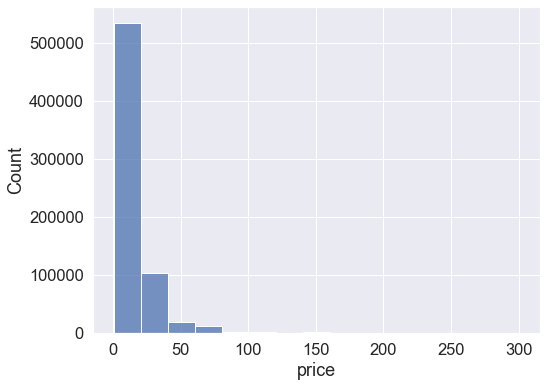

In [27]:
plt.rcParams["figure.figsize"] = (8,6)

sns.set(font_scale=1.5)
sns.histplot(data=transactions_full, x="price",binwidth=20)

In [28]:
print("La référence la plus chère : ")
transactions_full[(transactions_full.price > 200.00)]

La référence la plus chère : 


,id_prod,price,categ,date,session_id,client_id,sex,birth
1514,2_167,236.99,2.0,2021-01-12 08:01:52.205516,s_325730,c_4958,m,1999
1542,2_228,225.17,2.0,2020-06-06 14:19:53.356847,s_219702,c_4958,m,1999
2276,2_166,230.04,2.0,2019-06-23 15:50:59.897375,s_52724,c_4886,m,1995
2595,2_167,236.99,2.0,2020-06-21 07:25:06.023192,s_226950,c_6845,m,2002
3221,2_158,247.22,2.0,2020-12-08 03:47:39.751500,s_308748,c_5039,m,2004
...,...,...,...,...,...,...,...,...
677023,2_158,247.22,2.0,2019-12-19 11:03:40.911806,s_136713,c_7307,m,1993
677607,2_167,236.99,2.0,2019-05-17 22:12:13.597785,s_35913,c_740,m,1995
678052,2_167,236.99,2.0,2020-12-29 08:20:29.406570,s_318936,c_1194,f,1999
678680,2_167,236.99,2.0,2020-04-25 04:37:12.103703,s_199102,c_5398,f,2001


In [29]:
transactions_full

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1518,4.18,0.0,2020-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,1_251,15.99,1.0,2020-02-02 07:55:19.149409,s_158752,c_8534,m,1988
2,0_1277,7.99,0.0,2020-06-18 15:44:33.155329,s_225667,c_6714,f,1968
3,2_209,69.99,2.0,2019-06-24 04:19:29.835891,s_52962,c_6941,m,2000
4,0_1509,4.99,0.0,2021-01-11 08:22:08.194479,s_325227,c_4232,m,1980
...,...,...,...,...,...,...,...,...
679327,0_1551,12.99,0.0,2020-01-15 13:05:06.246925,s_150195,c_8489,f,1951
679328,1_639,10.99,1.0,2020-03-19 16:03:23.429229,s_181434,c_4370,f,1977
679329,0_1425,12.99,0.0,2020-12-20 04:33:37.584749,s_314704,c_304,f,1988
679330,0_1994,4.98,0.0,2019-07-16 20:36:35.350579,s_63204,c_2227,m,1986


In [30]:
transactions_full=transactions_full.sort_values('date', ascending=True)

In [31]:
transactions_full['age']=2022-transactions_full['birth']

In [32]:
transactions_full

,id_prod,price,categ,date,session_id,client_id,sex,birth,age
480501,0_1259,11.99,0.0,2019-03-01 00:01:07.843138,s_1,c_329,f,1967,55
428350,0_1390,19.37,0.0,2019-03-01 00:02:26.047414,s_2,c_664,m,1960,62
462563,0_1352,4.50,0.0,2019-03-01 00:02:38.311413,s_3,c_580,m,1988,34
488153,0_1458,6.55,0.0,2019-03-01 00:04:54.559692,s_4,c_7912,f,1989,33
438944,0_1358,16.49,0.0,2019-03-01 00:05:18.801198,s_5,c_2033,f,1956,66
...,...,...,...,...,...,...,...,...,...
184602,1_508,21.92,1.0,2021-02-28 23:49:03.148402,s_348444,c_3573,f,1996,26
588008,2_37,48.99,2.0,2021-02-28 23:51:29.318531,s_348445,c_50,f,1994,28
130140,1_695,26.99,1.0,2021-02-28 23:53:18.929676,s_348446,c_488,f,1985,37
550293,0_1547,8.99,0.0,2021-02-28 23:58:00.107815,s_348447,c_4848,m,1953,69


In [33]:
#transformation de la variable categ en int pour retirer le '.0'
transactions_full['categ']=transactions_full['categ'].astype(int)

# **Partie 2 : Les requêtes d'Antoine**


### <a name="C4"> II-1) Chiffre d'affaires par mois et par catégories</a>

In [34]:
#Création de 2 colonnes pour simplifier les date : l'une avec le mois et l'année, l'autre y ajoutant le jour
transactions_full['date_MY'] = transactions_full['date'].dt.strftime('%Y-%m')
transactions_full['date_DMY'] = transactions_full['date'].dt.strftime('%Y-%m-%d')


In [35]:
transactions_full

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,date_MY,date_DMY
480501,0_1259,11.99,0,2019-03-01 00:01:07.843138,s_1,c_329,f,1967,55,2019-03,2019-03-01
428350,0_1390,19.37,0,2019-03-01 00:02:26.047414,s_2,c_664,m,1960,62,2019-03,2019-03-01
462563,0_1352,4.50,0,2019-03-01 00:02:38.311413,s_3,c_580,m,1988,34,2019-03,2019-03-01
488153,0_1458,6.55,0,2019-03-01 00:04:54.559692,s_4,c_7912,f,1989,33,2019-03,2019-03-01
438944,0_1358,16.49,0,2019-03-01 00:05:18.801198,s_5,c_2033,f,1956,66,2019-03,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...
184602,1_508,21.92,1,2021-02-28 23:49:03.148402,s_348444,c_3573,f,1996,26,2021-02,2021-02-28
588008,2_37,48.99,2,2021-02-28 23:51:29.318531,s_348445,c_50,f,1994,28,2021-02,2021-02-28
130140,1_695,26.99,1,2021-02-28 23:53:18.929676,s_348446,c_488,f,1985,37,2021-02,2021-02-28
550293,0_1547,8.99,0,2021-02-28 23:58:00.107815,s_348447,c_4848,m,1953,69,2021-02,2021-02-28


In [36]:
#Création d'un dataframe qui pour chaque mois indique la somme du CA par catégorie
CA_month_categ = transactions_full[['price','categ','date_MY']].groupby(['date_MY','categ']).sum().reset_index()
CA_month_categ

,date_MY,categ,price
0,2019-03,0,193629.17
1,2019-03,1,186974.17
2,2019-03,2,101837.27
3,2019-04,0,205222.46
4,2019-04,1,156138.35
...,...,...,...
67,2021-01,1,210104.41
68,2021-01,2,126153.08
69,2021-02,0,162457.00
70,2021-02,1,180347.24


In [37]:
# Calcul du CA total : 
CA_month_categ['price'].sum()

11853728.68

In [38]:
#Pour la création de la figure suivante, il faut transformer le DF en format wide (1 colonne par catégorie)

CA_month_categ2=CA_month_categ.pivot(index='date_MY', columns='categ', values='price').reset_index()
CA_month_categ2

categ,date_MY,0,1,2
0,2019-03,193629.17,186974.17,101837.27
1,2019-04,205222.46,156138.35,114748.49
2,2019-05,196186.72,165893.40,130863.35
3,2019-06,167943.15,189162.04,126983.37
4,2019-07,144750.79,188523.27,149561.34
5,2019-08,167737.62,162991.38,151555.79
6,2019-09,246353.91,190613.78,70272.99
7,2019-10,199250.83,33762.32,87785.59
8,2019-11,155909.56,252910.39,107347.78
9,2019-12,206036.24,251026.75,68854.29


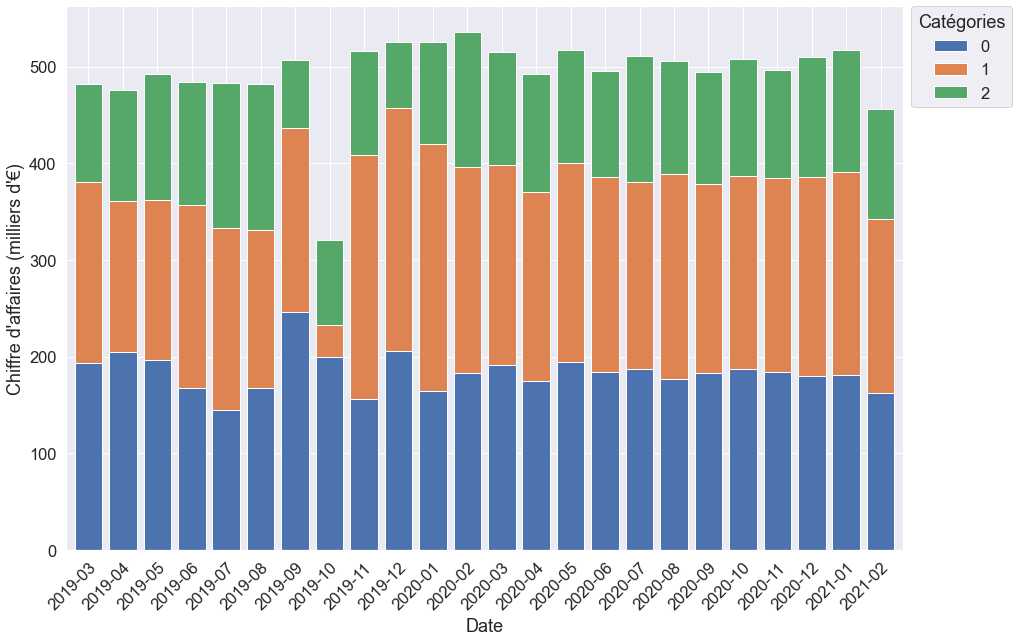

In [39]:
#Représentation graphique

plt.rcParams["figure.figsize"] = (15,10)

((CA_month_categ2.set_index('date_MY'))/1000).plot(kind='bar', stacked=True,width=.8)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0,title='Catégories')
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires (milliers d'€)")
plt.savefig('fig1_CA_categ.png', dpi=300, bbox_inches='tight')

Le chiffre d'affaire au mois d'Octobre 2019 est bien inférieur à celui des autres mois. Il semblerait que cela soit lié à une diminution du CA des produits de catégorie 1.

### Investigation du problème d'octobre 2019

In [40]:
#On commence par créer un DF qui présente le nombre de vente pour chaque jour et chaque catégorie
transactions_days_ventes=transactions_full.value_counts(subset=['date_DMY','categ'], sort=False).copy().reset_index()
transactions_days_ventes.columns = ['date_DMY', 'categ','nb_ventes']

#Il faut par la suite intégrer nb_ventes = 0 pour chaque jour sans vente. 
transactions_days_ventes = transactions_days_ventes.pivot(values='nb_ventes',index='date_DMY',columns=['categ']).fillna(0).unstack()
transactions_days_ventes = transactions_days_ventes.reset_index()
transactions_days_ventes.columns = ['categ','date_DMY','nb_ventes']

#Création d'une colonne 'moving' qui établit une moyenne mobile du nb de vente sur 14j. 
transactions_days_ventes['moving'] = transactions_days_ventes.groupby('categ')['nb_ventes'].transform(lambda x: x.rolling(14, 1).mean())
print(transactions_days_ventes)

      categ    date_DMY  nb_ventes      moving
0         0  2019-03-01      581.0  581.000000
1         0  2019-03-02      620.0  600.500000
2         0  2019-03-03      591.0  597.333333
3         0  2019-03-04      563.0  588.750000
4         0  2019-03-05      561.0  583.200000
...     ...         ...        ...         ...
2185      2  2021-02-24       47.0   51.428571
2186      2  2021-02-25       46.0   53.071429
2187      2  2021-02-26       53.0   53.500000
2188      2  2021-02-27       75.0   55.285714
2189      2  2021-02-28       50.0   53.928571

[2190 rows x 4 columns]


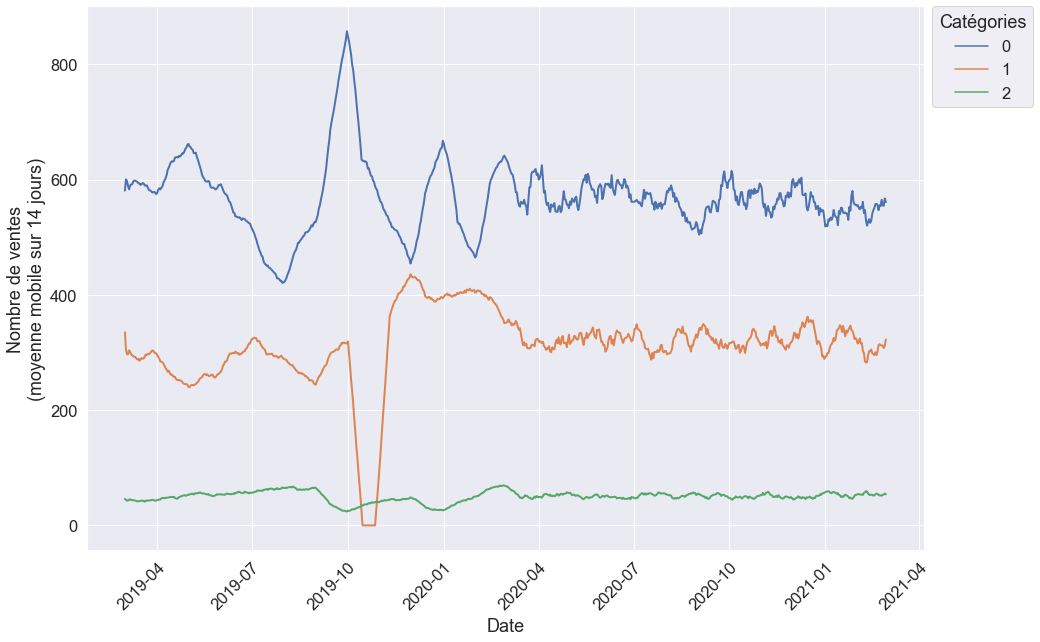

In [41]:
plt.rcParams["figure.figsize"] = (15,10)

sns.lineplot(x=pd.to_datetime(transactions_days_ventes['date_DMY']), 
             y='moving', 
             hue=transactions_days_ventes['categ'].astype("string"), 
             data=transactions_days_ventes,
             linewidth = 2,
             ci=None) 
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes\n(moyenne mobile sur 14 jours)")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0,title='Catégories')
plt.savefig('fig2_Ventes_categ1_jour.png', dpi=300, bbox_inches='tight')


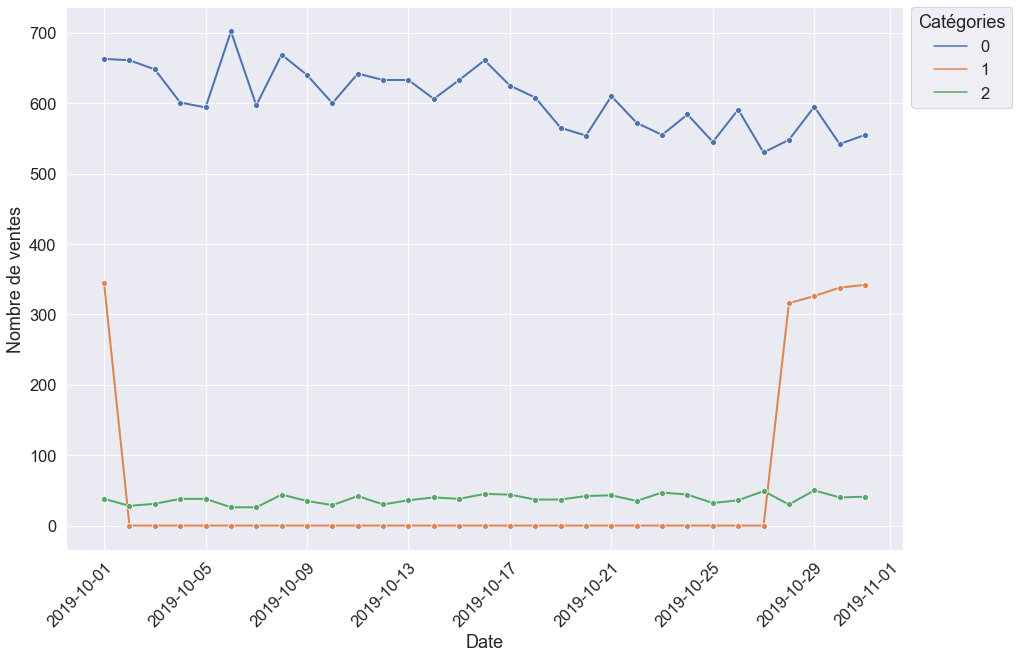

In [42]:
# On peut regarder uniquement au mois d'octobre 2019 pour regarder la periode sans vente
transactions_days_ventes["date_MY"]=pd.to_datetime(transactions_days_ventes['date_DMY']).dt.strftime('%Y-%m')
transactions_days_categ2019 = transactions_days_ventes[transactions_days_ventes["date_MY"] == '2019-10'].copy().reset_index()

plt.rcParams["figure.figsize"] = (15,10)

sns.lineplot(x=pd.to_datetime(transactions_days_categ2019['date_DMY']), 
             y=transactions_days_categ2019['nb_ventes'], 
             hue=transactions_days_categ2019['categ'].astype("string"), 
             data=transactions_days_categ2019,
             marker="o",
             linewidth = 2) 
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0,title='Catégories')
plt.savefig('fig3_Ventes_categ1_jour.png', dpi=300, bbox_inches='tight')

      categ    date_DMY       CA       moving
0         0  2019-03-01  6262.65  6262.650000
1         0  2019-03-02  6718.27  6490.460000
2         0  2019-03-03  6121.03  6367.316667
3         0  2019-03-04  5891.48  6248.357500
4         0  2019-03-05  5975.97  6193.880000
...     ...         ...      ...          ...
2185      2  2021-02-24  3538.90  3883.170000
2186      2  2021-02-25  2767.95  3934.201429
2187      2  2021-02-26  3772.73  3920.675714
2188      2  2021-02-27  5271.62  4027.663571
2189      2  2021-02-28  3977.04  3977.801429

[2190 rows x 4 columns]


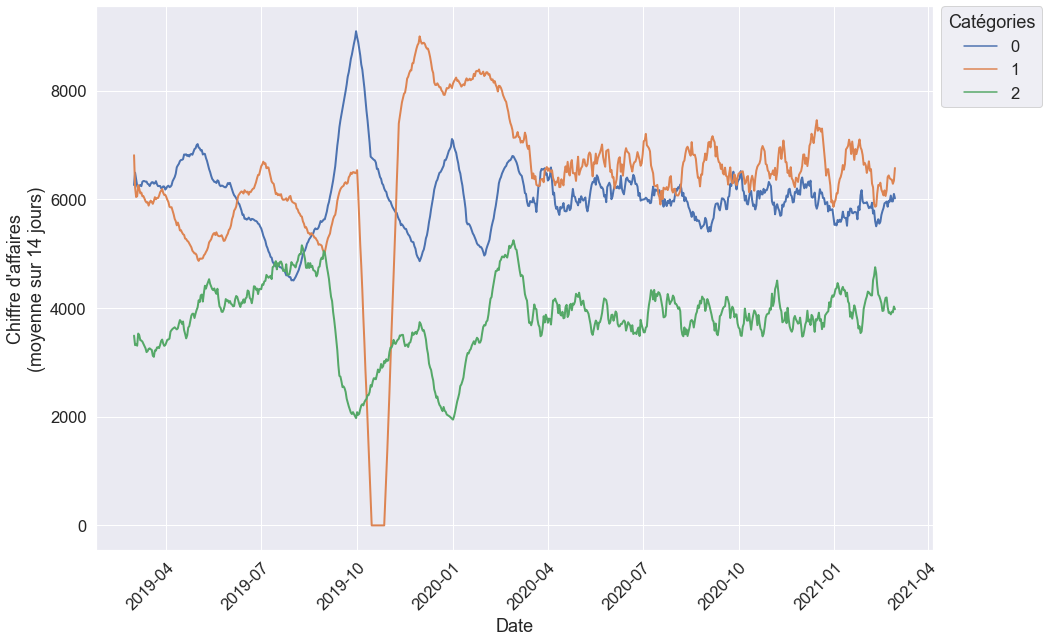

In [43]:
#De la même manière, on peut regarder le chiffre d'affaire par jour (moyenne mobile sur 14j)
transactions_days_CA = transactions_full[['price','date_DMY','categ']].groupby(['date_DMY','categ']).sum().reset_index().copy()
transactions_days_CA = transactions_days_CA.pivot(values='price',index='date_DMY',columns=['categ']).fillna(0).unstack()
transactions_days_CA = transactions_days_CA.reset_index()

transactions_days_CA.columns = ['categ', 'date_DMY','CA']
transactions_days_CA['moving'] = transactions_days_CA.groupby('categ')['CA'].transform(lambda x: x.rolling(14, 1).mean())
print(transactions_days_CA)

plt.rcParams["figure.figsize"] = (15,10)

#fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=pd.to_datetime(transactions_days_CA['date_DMY']), 
             y='moving', 
             hue=transactions_days_CA['categ'].astype("string"), 
             data=transactions_days_CA,
             linewidth = 2) 
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires\n(moyenne sur 14 jours)")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0,title='Catégories')
plt.savefig('fig4_CA_categ_jour.png', dpi=300, bbox_inches='tight')

## <a name="C5"> II-2) Répartition du chiffre d'affaires entre les clients : La Courbe de Lorenz </a>

In [44]:
# La première étape est de déterminer le chiffre d'affaires par client
client_CA=transactions_full.pivot_table(index="client_id", values="price", aggfunc=["sum"]).reset_index()
client_CA.columns = ['client_id', 'CA']

In [45]:
client_CA

,client_id,CA
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86
...,...,...
8595,c_995,189.41
8596,c_996,1625.58
8597,c_997,1490.01
8598,c_998,2779.88


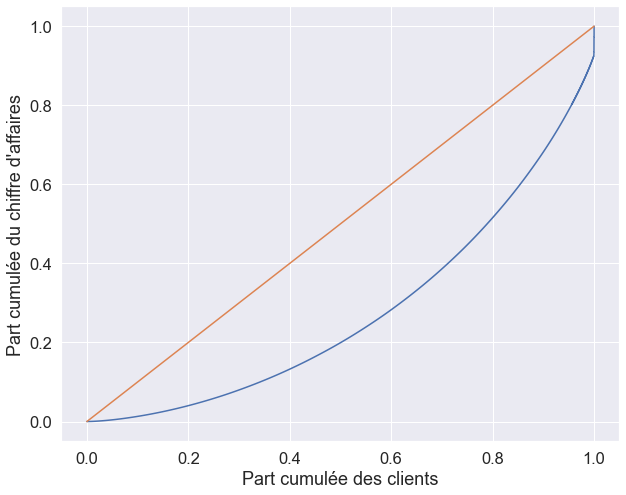

L'indice de gini est de : 0.45


In [46]:
# La seconde étape est de calculer la part cumulée du chiffre d'affaire : 

client_CA_prix = client_CA['CA'].values
n = len(client_CA_prix)
lorenz = np.cumsum(np.sort(client_CA_prix)) / client_CA_prix.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# Représentation graphique et création de l'axe x (part cumulée des clients)
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 20})
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée du chiffre d'affaires")
plt.savefig('fig5_lorenz.png', dpi=300)
plt.show()
#Calcul de l'indice de Gini, allant de 0 (C.A. équilibré entre les clients) à 1 (C.A. dédéquilibré entre les clients)
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de gini est de :",round(gini,2))

La fin de la courbe de Lorenz suggère qu'un très petit nombre de client ont un fort impact sur le CA.

### Investigation sur la fin de la courbe de Lorenz

In [47]:
# Quels sont les clients qui affecte le plus le CA : 
print(client_CA.sort_values('CA', ascending=False).head(10))

     client_id         CA
677     c_1609  324033.35
4388    c_4958  289760.34
6337    c_6714  153598.92
2724    c_3454  113637.93
2513    c_3263    5276.87
634     c_1570    5271.62
2108    c_2899    5214.05
1268    c_2140    5208.82
7006    c_7319    5155.77
7715    c_7959    5085.45


In [48]:
(client_CA[(client_CA['CA'] >100000)]['CA'].sum())/(client_CA['CA'].sum())*100

7.432518187180238

Les quatre clients c_1609, c_4958, c_6714 et c_3454 représentent à eux seuls 7.43% du C.A.

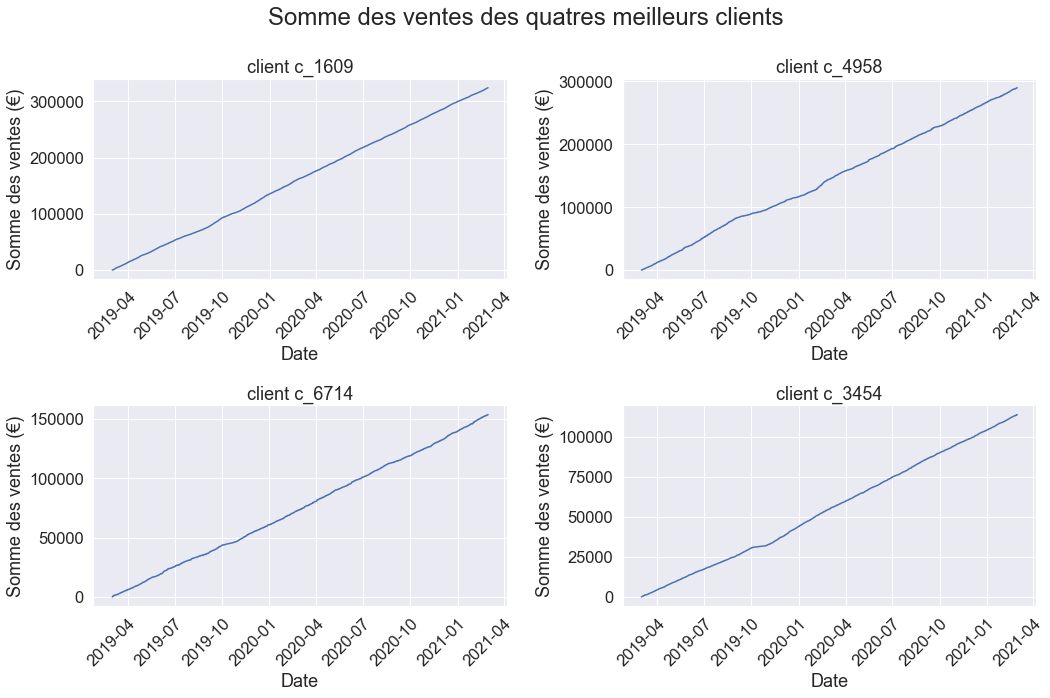

In [49]:
c_1609=transactions_full.loc[transactions_full['client_id']=='c_1609',:]
c_1609=c_1609.sort_values('date', ascending=True)
c_1609['Somme_Cum']=np.cumsum(c_1609['price'])

c_4958=transactions_full.loc[transactions_full['client_id']=='c_4958',:]
c_4958=c_4958.sort_values('date', ascending=True)
c_4958['Somme_Cum']=np.cumsum(c_4958['price'])

c_6714=transactions_full.loc[transactions_full['client_id']=='c_6714',:]
c_6714=c_6714.sort_values('date', ascending=True)
c_6714['Somme_Cum']=np.cumsum(c_6714['price'])

c_3454=transactions_full.loc[transactions_full['client_id']=='c_3454',:]
c_3454=c_3454.sort_values('date', ascending=True)
c_3454['Somme_Cum']=np.cumsum(c_3454['price'])

plt.rcParams["figure.figsize"] = (15,10)
fig, axes = plt.subplots(2,2)
fig.suptitle('Somme des ventes des quatres meilleurs clients')

sns.lineplot(ax=axes[0,0],x="date", y="Somme_Cum", data=c_1609)
plt.setp(axes[0,0].get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')
axes[0,0].set_title('client c_1609')
axes[0,0].set(xlabel='Date', ylabel='Somme des ventes (€)')

sns.lineplot(ax=axes[0,1],x="date", y="Somme_Cum", data=c_4958)
plt.setp(axes[0,1].get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')
axes[0,1].set_title('client c_4958')
axes[0,1].set(xlabel='Date', ylabel='Somme des ventes (€)')

sns.lineplot(ax=axes[1,0],x="date", y="Somme_Cum", data=c_6714)
plt.setp(axes[1,0].get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')
axes[1,0].set_title('client c_6714')
axes[1,0].set(xlabel='Date', ylabel='Somme des ventes (€)')

sns.lineplot(ax=axes[1,1],x="date", y="Somme_Cum", data=c_3454)
plt.setp(axes[1,1].get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')
axes[1,1].set_title('client c_3454')
axes[1,1].set(xlabel='Date', ylabel='Somme des ventes (€)')

fig.tight_layout()
plt.savefig('fig6_top4_clients.png', dpi=300, bbox_inches='tight')

In [50]:
# Pour la suite des analyses, nous allons mettre de côté ces quatre clients
mask = transactions_full['client_id'].isin(['c_1609', 'c_4958', 'c_6714','c_3454'])
transactions_filter = transactions_full[~mask].copy()
print(transactions_filter.loc[transactions_filter['client_id']=='c_1609',:])
print(transactions_filter.loc[transactions_filter['client_id']=='c_4958',:])
print(transactions_filter.loc[transactions_filter['client_id']=='c_6714',:])
print(transactions_filter.loc[transactions_filter['client_id']=='c_3454',:])

Empty DataFrame
Columns: [id_prod, price, categ, date, session_id, client_id, sex, birth, age, date_MY, date_DMY]
Index: []
Empty DataFrame
Columns: [id_prod, price, categ, date, session_id, client_id, sex, birth, age, date_MY, date_DMY]
Index: []
Empty DataFrame
Columns: [id_prod, price, categ, date, session_id, client_id, sex, birth, age, date_MY, date_DMY]
Index: []
Empty DataFrame
Columns: [id_prod, price, categ, date, session_id, client_id, sex, birth, age, date_MY, date_DMY]
Index: []


## <a name="C6">II-3) Analyse des catégories les plus vendus et les moins vendus</a>


In [51]:
#La ligne ci-dessous présente le nombre de vente, la somme du CA et le prix moyen par catégorie
categ_ventes=transactions_filter.pivot_table(index="categ", values="price", aggfunc=["count","sum","mean"]).reset_index()
categ_ventes.columns = ['categ', 'nb_ventes','CA_tot_categ','prix_moyen']
categ_ventes

,categ,nb_ventes,CA_tot_categ,prix_moyen
0,0,387281,4119200.69,10.636207
1,1,212348,4349432.99,20.482571
2,2,32848,2504064.46,76.231870


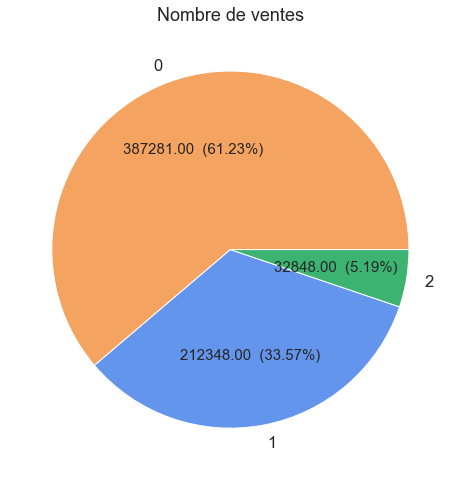

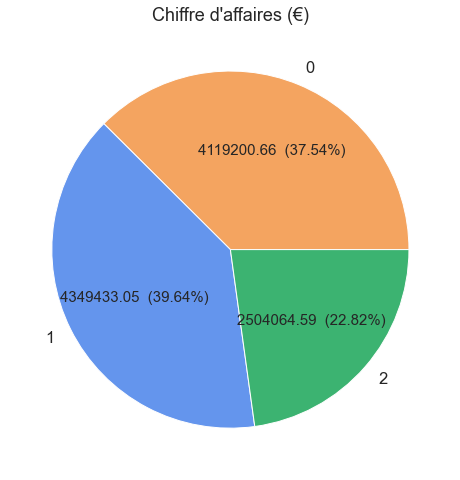

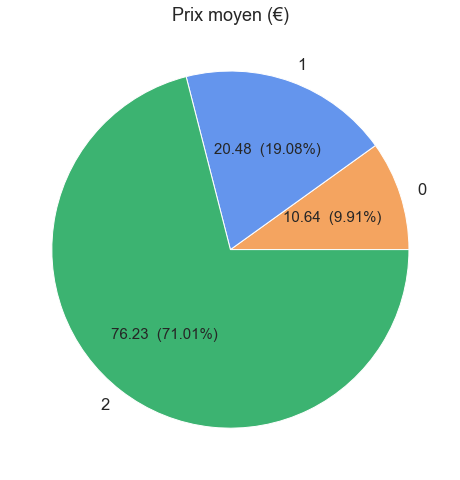

In [52]:
#cette fonction permet d'afficher à la fois l'effectif + le pourcentage de chaque groupe dans un pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = (pct*total/100.0)
        return '{v:.2f}  ({p:.2f}%)'.format(p=pct,v=val)
    return my_autopct

colors = ['sandybrown','cornflowerblue','mediumseagreen']

plt.rcParams["figure.figsize"] = (8,10)
plt.rcParams['font.size'] = 15

plt.pie(categ_ventes['nb_ventes'], labels = categ_ventes["categ"], autopct=make_autopct(categ_ventes['nb_ventes']),colors=colors)
plt.title("Nombre de ventes")
plt.savefig('fig7a_categ_nbventes.png', dpi=300, bbox_inches='tight')
plt.show()

plt.pie(categ_ventes['CA_tot_categ'], labels = categ_ventes["categ"],autopct=make_autopct(categ_ventes['CA_tot_categ']),colors=colors)
plt.title("Chiffre d'affaires (€)")
plt.savefig('fig7b_categ_CA.png', dpi=300, bbox_inches='tight')
plt.show()

plt.pie(categ_ventes['prix_moyen'], labels = categ_ventes["categ"], autopct=make_autopct(categ_ventes['prix_moyen']), 
        colors=colors)
plt.title("Prix moyen (€)")
plt.savefig('fig7c_categ_prixmoyen.png', dpi=300, bbox_inches='tight')
plt.show()

In [53]:
# Test du Chi2 pour vérifier le nombre de vente par catégorie
#H0: pas d'effet de la catégorie, on attend une répartition égale de ventes dans chaque categ.
#H1: Effet de la categ. au moins une des valeur est différente de 33% (3 catégories)
print(transactions_filter['categ'].value_counts())
print(chisquare(transactions_filter['categ'].value_counts()))

0    387281
1    212348
2     32848
Name: categ, dtype: int64
Power_divergenceResult(statistic=297946.89131462487, pvalue=0.0)


In [54]:
# On peut aussi chercher a tester par exemple l'effet de la catégorie sur le prix du produit
#Pour cela nous allons réaliser une ANOVA. Un test post_hoc suivra et nous vérifierons les conditions d'applications de l'ANOVA.

#Le test est une ANOVA à un facteur 
model = smf.ols('price ~ C(categ)', data=transactions_filter).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                 5.725e+05
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:23:50   Log-Likelihood:            -2.4021e+06
No. Observations:              632477   AIC:                         4.804e+06
Df Residuals:                  632474   BIC:                         4.804e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.6362      0.017    613.178      0.000      10.602      10.670
C(categ)[T.1]     9.8464      0.029    337.799      0.000       9.789       9.903
C(categ)[T.2]    65.5957      0.062   1057.397      0.000      65.474      65.717
==============================================================================
Omnibus:                   731111.687   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        140604292.842
Skew:                           5.882   Prob(JB):                         0.00
Kurtosis:                      75.090   Cond. No.                         4.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# La p-value est de 0, on rejette H0, au moins une des catégories à des prix moyens différents des autres.
# On peut réaliser une analyse post-hoc pour comaprer deux à deux les moyennes de chaque groupe et déterminer lequel ou lesquels
# sont significativement différents. 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=transactions_filter['price'],
                          groups=transactions_filter['categ'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   9.8464 0.001   9.778  9.9147   True
     0      2  65.5957 0.001 65.4503 65.7411   True
     1      2  55.7493 0.001 55.5993 55.8993   True
---------------------------------------------------


Il est important de vérifier les conditions d'application de l'ANOVA : 
- les catégories sont indépendantes > On assume ici que c'est le cas
- les variances des prix de ventes sont homogènes (homoscedasticité) entre les catégories.
- les résidus doivent suivre une loi Normal.


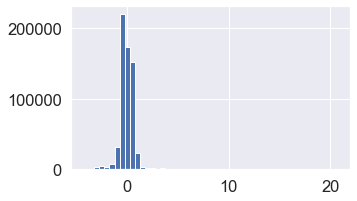

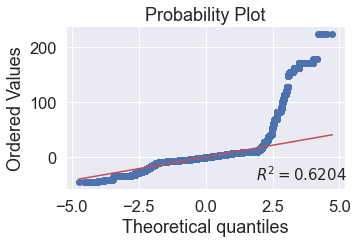

valeur de la statistique : 0.6202946901321411 , p-value : 0.0


B:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [56]:
#test de la normalité des résidus (visuellement + test de shapiro)
plt.rcParams["figure.figsize"] = (5,3)

residues = model.resid_pearson
residues_std = residues/np.sqrt(sum(residues**2)/(len(residues)-1))
plt.hist(residues_std,bins=50)
plt.show()

import scipy.stats as stats

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
plt.show()

w, pvalue = stats.shapiro(model.resid)
print(f"valeur de la statistique : {w} , p-value : {pvalue}")

In [57]:
#test de l'homoscedasticité : test de bartlett

from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=transactions_filter, res_var='price', xfac_var='categ')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),670819.6745
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


Les conditions d'application de l'ANOVA ne sont pas respectées. On peut soit être très précautionneux avec les résultats de l'ANOVA (pouvant entraîner des erreurs dans l'estimation de la moyenne des prix), soit réaliser un test non paramétrique pour vérifier si oui ou non on rejette H0.

In [58]:
#Lorsque les conditions d'applications ne sont pas respectées, on peut utiliser un test non paramétrique (Kruskal-Wallis)

x=transactions_full.loc[transactions_full['categ']==0]["price"]
y=transactions_full.loc[transactions_full['categ']==1]["price"]
z=transactions_full.loc[transactions_full['categ']==2]["price"]
stats.kruskal(x, y, z)

KruskalResult(statistic=324919.9088778667, pvalue=0.0)

In [59]:
# On rejette H0, au moins un des trois groupes à une moyenne de prix qui diffèrent significativement
# La suite de l'analyse fait appel à un test post-hoc (non paramétrique) pour comparer les moyennes deux à deux
import scikit_posthocs as sp
sp.posthoc_conover(transactions_full, val_col='price', group_col='categ', p_adjust = 'holm')

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


## <a name="C7"> II-4) Analyse sur le profil des clients : Proportion de femme/homme, classes d'âges </a>

### La proportion de femme/homme dans notre clientèle

In [60]:
#Comptage des clients femme et des clients homme, puis calcul de leur proportion. 
sex_client=customers['sex'].value_counts().reset_index()
sex_client.columns = ['sexe', 'effectif']
sex_client['prop']=(sex_client['effectif']/sex_client['effectif'].sum())*100


In [61]:
sex_client

,sexe,effectif,prop
0,f,4490,52.082125
1,m,4131,47.917875


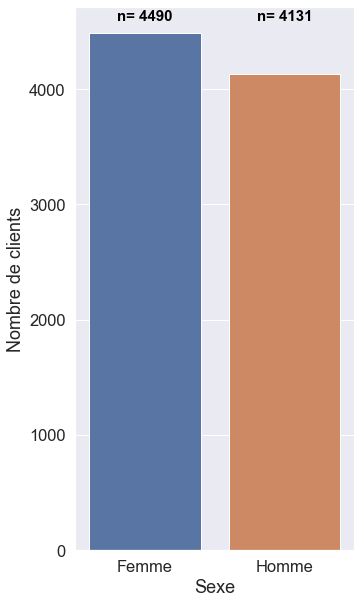

In [62]:
plt.rcParams["figure.figsize"] = (5,10)

ax = sns.barplot(x="sexe", y="effectif", data=sex_client)
ax.set_xticklabels(['Femme','Homme'])
plt.xlabel("Sexe")
plt.ylabel("Nombre de clients")

# Récupération et représentation des effectifs par âge : 
nobs = customers['sex'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            4599,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='black',
            weight='semibold')
    
plt.savefig('fig8_effectif_sexe.png', dpi=300, bbox_inches='tight')


#### test statistique

In [63]:
#On cherche ici a savoir si le nombre de femme et d'homme diffère significativement dans notre clientèle
#On réalise alors un test de Chi2
# H0 : La proportion de femme et d'homme est identique (50%)
# H1 : La proportion n'est pas identique
chisquare(customers['sex'].value_counts())

Power_divergenceResult(statistic=14.949657812318756, pvalue=0.000110418086720979)

On rejette H0 (avec une probabilité de rejeter à tord H0 de 0.0001): Il y a significativement plus de femmes dans notre clientèle. 

### L'âge des clients

In [64]:
# tranformation de la date de naissance en âge.
age_client=(2022-customers['birth']).value_counts().reset_index()
age_client.columns = ['age', 'effectif']
age_client['prop']=(age_client['effectif']/age_client['effectif'].sum())*100


In [65]:
age_client

,age,effectif,prop
0,18,440,5.103816
1,43,215,2.493910
2,34,207,2.401114
3,36,203,2.354715
4,44,199,2.308317
...,...,...,...
71,89,8,0.092797
72,90,6,0.069597
73,91,4,0.046398
74,92,4,0.046398


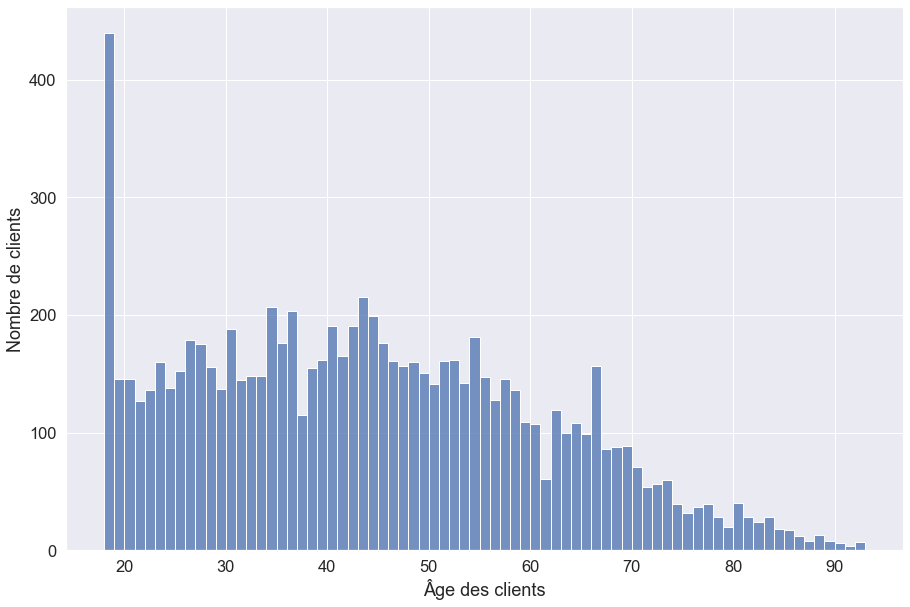

In [66]:
plt.rcParams["figure.figsize"] = (15,10)
sns.histplot(data=customers, x=2022-customers['birth'],binwidth=1)
plt.xlabel("Âge des clients")
plt.ylabel("Nombre de clients")
plt.savefig('fig9_effectif_age.png', dpi=300, bbox_inches='tight')

Les clients âgés de 18 ans sont les plus nombreux dans notre clientèle. Il représentent 5.1% de notre effectif total. Pour la suite des analyses, notemment via les requêtes de Julie, nous formerons 3 groupes d'âges 18-30, 31-50 et 51+.

# **Partie 3 : Les requêtes de Julie**


- Lien entre âge des clients et montant total des achats
- Lien entre âge des clients et la fréquence d'achat
- Lien entre âge des clients et la taille du panier moyen
- Lien entre âge des clients et les catégories des livres achetés
- Lien entre le genre d’un client et les catégories des livres achetés

In [67]:
# Pour la suite de l'analyse, nous allons modifier la structure du DF
# La ligne suivante transforme le précédent DF pour montrer une ligne par session (et par client) et récapitulant la somme du panier,
# le nombre d'achat et la moyenne du prix des articles dans le panier
client_session=transactions_filter.pivot_table(index=["client_id","age","session_id"], values="price", aggfunc=["sum","count","mean"]).reset_index()
client_session.columns = ['client_id', 'age', 'session_id','Somme_panier','nombre_achat','moy_prix']


In [68]:
client_session

,client_id,age,session_id,Somme_panier,nombre_achat,moy_prix
0,c_1,67,s_105105,7.99,1,7.990
1,c_1,67,s_114737,92.62,5,18.524
2,c_1,67,s_120172,44.29,2,22.145
3,c_1,67,s_134971,10.30,1,10.300
4,c_1,67,s_136532,13.78,1,13.780
...,...,...,...,...,...,...
319232,c_999,58,s_88239,15.99,1,15.990
319233,c_999,58,s_89648,5.99,1,5.990
319234,c_999,58,s_92374,8.57,1,8.570
319235,c_999,58,s_98289,11.99,1,11.990


### Discrétisation en groupe d'âge

In [69]:
# Création des 3 groupes d'âges
age = pd.cut(client_session['age'], [18,30, 50,93],3,labels=['18-30','31-50','51+'])
client_session['groupe_age']=age
age.describe()

count     310643
unique         3
top        31-50
freq      163587
Name: age, dtype: object

In [70]:
#Comptage des clients dans chaque groupe
groupe_client=client_session['groupe_age'].value_counts().reset_index()
groupe_client.columns = ['groupe_age', 'effectif']
groupe_client['prop']=(groupe_client['effectif']/groupe_client['effectif'].sum())*100
groupe_client

,groupe_age,effectif,prop
0,31-50,163587,52.660771
1,51+,113282,36.466941
2,18-30,33774,10.872287


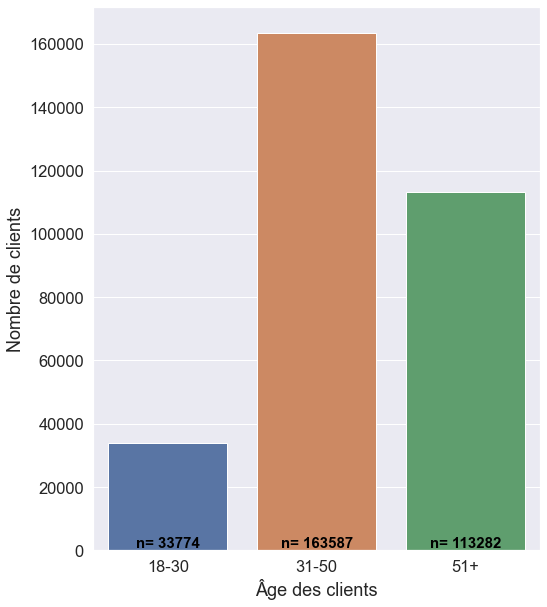

In [71]:
plt.rcParams["figure.figsize"] = (8,10)

ax = sns.barplot(x="groupe_age", y="effectif", data=groupe_client)
plt.xlabel("Âge des clients")
plt.ylabel("Nombre de clients")

# Récupération et représentation des effectifs par âge : 
nobs = client_session['groupe_age'].value_counts()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs]
nobs[0],nobs[1],nobs[2] = nobs[2],nobs[0],nobs[1]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            1000,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='black',
            weight='semibold')
    
plt.savefig('fig10_effectif_groupe_age.png', dpi=300, bbox_inches='tight')


In [72]:
#Pour information, nous pouvons tester si les effectifs sont égaux entre les groupes d'âge, toujours avec un test de Chi2
# H0 : Les proportions sont homogènes 
# H1 : Les proportions ne sont pas homogènes
chisquare(client_session['groupe_age'].value_counts())

Power_divergenceResult(statistic=82742.98811819355, pvalue=0.0)

## <a name="C8"> III-1) Lien entre l'âge et la fréquence d'achat </a>

### Fréquence des achats (mensuelle)

In [73]:
#On utilise le DF client_session pour compter le nombre de session par client sur les 2 ans d’ouverture de site en ligne.
freq_achat=client_session.groupby(['client_id','age']).agg({'session_id':'count'}).reset_index()
freq_achat.columns = ['client_id', 'age', 'nb_session']
freq_achat['freq_mensuelle']=freq_achat['nb_session']/24
freq_achat

,client_id,age,nb_session,freq_mensuelle
0,c_1,67,33,1.375000
1,c_10,66,34,1.416667
2,c_100,30,5,0.208333
3,c_1000,56,93,3.875000
4,c_1001,40,47,1.958333
...,...,...,...,...
8591,c_995,67,9,0.375000
8592,c_996,52,79,3.291667
8593,c_997,28,24,1.000000
8594,c_998,21,23,0.958333


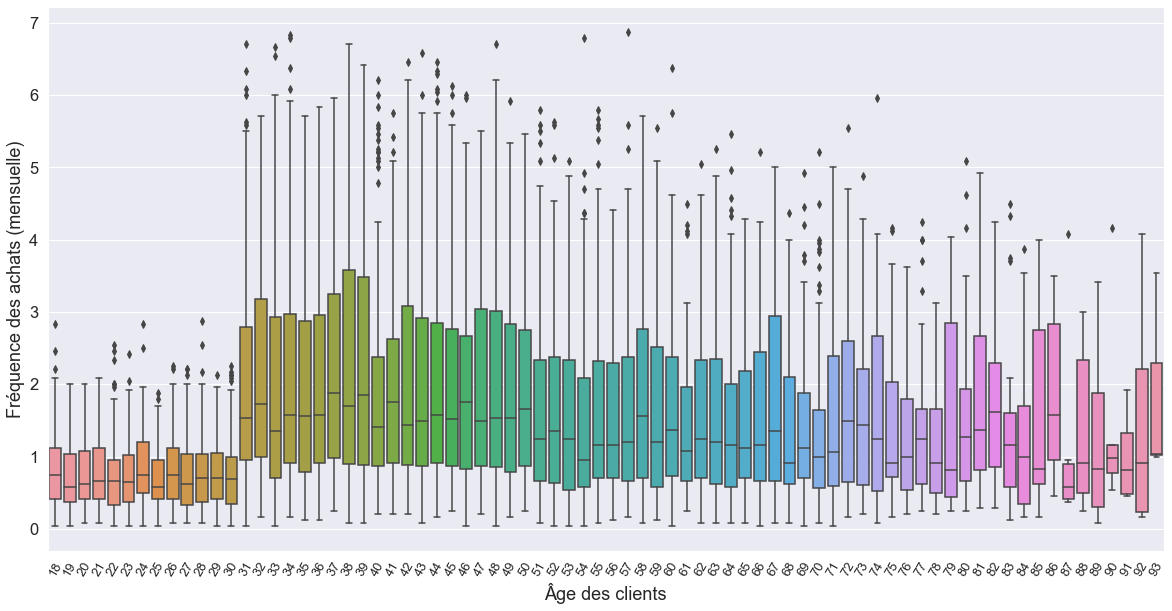

In [74]:
#Représentation graphique

plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(y='freq_mensuelle', x='age', data=freq_achat)
plt.xticks(rotation=60,fontsize=13)
plt.xlabel('Âge des clients')
plt.ylabel('Fréquence des achats (mensuelle)')
plt.savefig('fig11a_freq_achat1.png', dpi=300, bbox_inches='tight')

In [75]:
# On réalise la même opération avec les groupes d'âges. 
freq_achat_dis=client_session.groupby(['client_id','groupe_age']).agg({'session_id':'count'}).reset_index()
freq_achat_dis.columns = ['client_id', 'groupe_age', 'nb_session']
freq_achat_dis= freq_achat_dis[freq_achat_dis['nb_session'] != 0]
freq_achat_dis['freq_mensuelle']=freq_achat_dis['nb_session']/24
freq_achat_dis

,client_id,groupe_age,nb_session,freq_mensuelle
2,c_1,51+,33,1.375000
5,c_10,51+,34,1.416667
6,c_100,18-30,5,0.208333
11,c_1000,51+,93,3.875000
13,c_1001,31-50,47,1.958333
...,...,...,...,...
25775,c_995,51+,9,0.375000
25778,c_996,51+,79,3.291667
25779,c_997,18-30,24,1.000000
25782,c_998,18-30,23,0.958333


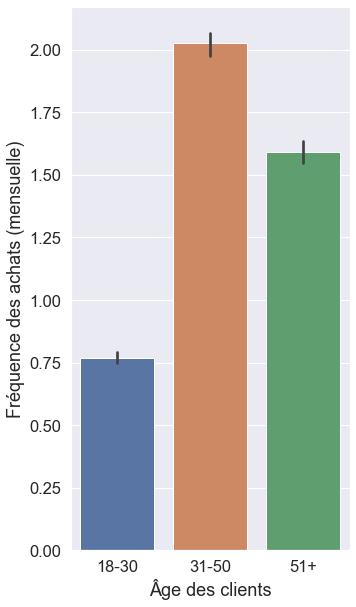

In [76]:
plt.rcParams["figure.figsize"] = (5,10)
sns.barplot(x="groupe_age", y='freq_mensuelle', data=freq_achat_dis,order=["18-30", "31-50","51+"])
plt.xlabel('Âge des clients')
plt.ylabel("Fréquence des achats (mensuelle)")
plt.savefig('fig11b_freq_achat2.png', dpi=300, bbox_inches='tight')

#### Test statistique

<AxesSubplot:xlabel='nb_session', ylabel='Count'>

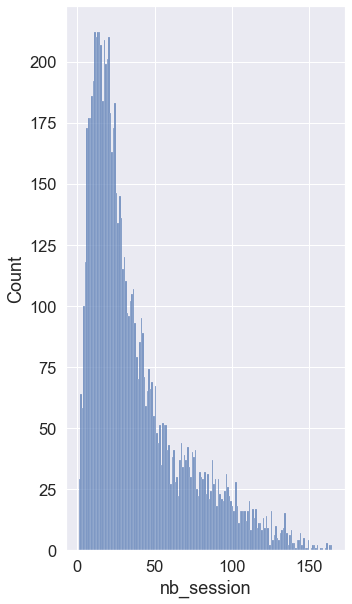

In [77]:
sns.histplot(data=freq_achat, x='nb_session',binwidth=1)

In [78]:
# Le nombre de session (ou fréquence d'achat) sont des données de comptage, suivant une loi de Poisson et plus une loi Normal.
#Pour réaliser un modèle linéaire (généralisé), il faut donc changer la famille de la loi utilisé. 
import statsmodels.api as sm
import statsmodels.formula.api as smf

freq_model = smf.glm('freq_mensuelle ~ groupe_age', data = freq_achat_dis, family=sm.families.Poisson()).fit()

print(freq_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         freq_mensuelle   No. Observations:                 8159
Model:                            GLM   Df Residuals:                     8156
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12025.
Date:                Wed, 30 Mar 2022   Deviance:                       6520.5
Time:                        08:24:06   Pearson chi2:                 6.88e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.2621    

In [79]:
# Afin d'estimer la valeur du nombre de visite pour chaque groupe, 
#il faut utiliser la fonction inverse de la fonction de lien utilisée (Poisson > fonction log)
np.exp([-0.2621,-0.2621+0.9680,-0.2621+0.7271])

array([0.76943408, 2.02566897, 1.59201419])

Les modèles linéaires généralisés ne testent pas le modèle, il n'y a donc pas statistique (F) ni p-value. Pour tester l'effet du groupe d'âges sur la fréquence d'achat, on peut comparer notre modèle (freq_model) à un modèle nul.

Le modèle le plus vraisemblable (expliquant le mieux les données sans paramètres superflus) est, par exemple, celui avec l'AIC (Critère d'information d'Akaike) le plus faible. 

In [80]:
# création du modèle nul
freq_model0 = smf.glm('freq_mensuelle ~ 1', data = freq_achat_dis, family=sm.families.Poisson()).fit()
print(freq_model0.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:         freq_mensuelle   No. Observations:                 8159
Model:                            GLM   Df Residuals:                     8158
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12689.
Date:                Wed, 30 Mar 2022   Deviance:                       7848.4
Time:                        08:24:06   Pearson chi2:                 8.75e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4615      0.009     52.501      0.0

In [81]:
print('AIC du modèle :')
print("modèle nul =",freq_model0.aic)
print("modèle groupe_age =",freq_model.aic)

AIC du modèle :
modèle nul = 25380.032697926592
modèle groupe_age = 24056.106782320276


L'âge a bien un effet sur la fréquence d'achat. 

### <a name="C9"> III-2) Lien entre l'âge et le nombre total de produits achetés

In [82]:
# Pour obtenir le nombre total de produit acheté, il suffit de faire la somme du nombre de produits achetés par client. 
nb_produits=client_session.groupby(['client_id','age']).agg({'nombre_achat':'sum'}).reset_index()

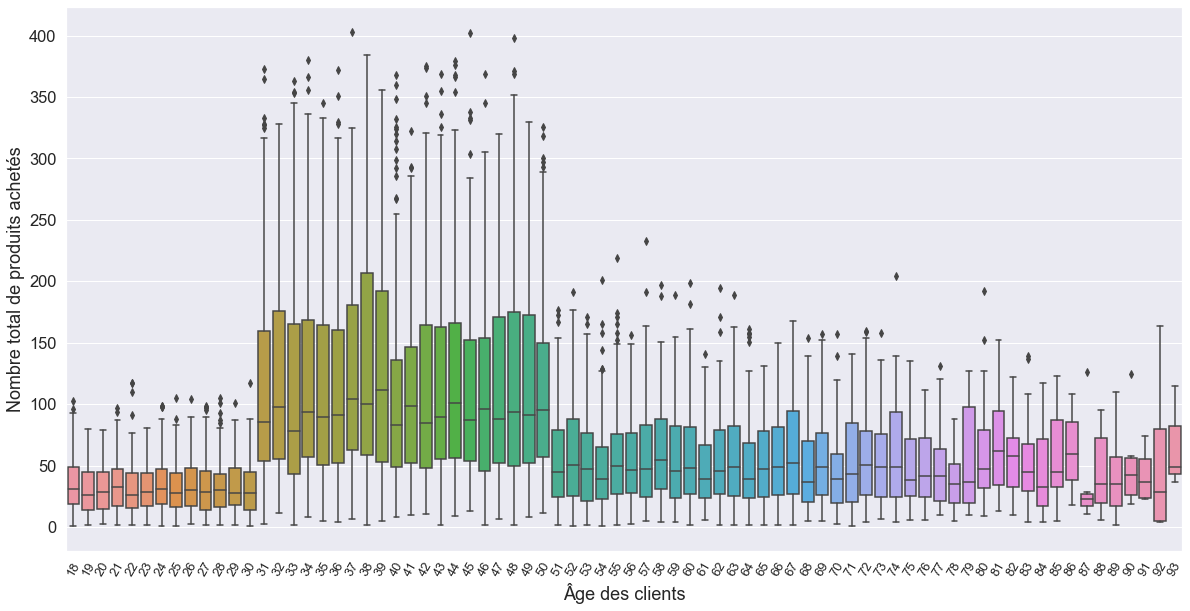

In [83]:
plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(y=nb_produits['nombre_achat'], x='age', data=nb_produits)
plt.xticks(rotation=60,fontsize=13)
plt.xlabel('Âge des clients')
plt.ylabel('Nombre total de produits achetés')
plt.savefig('fig12a_nb_tot_achete1.png', dpi=300, bbox_inches='tight')

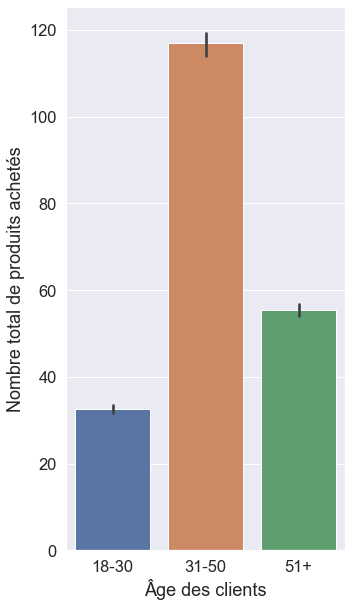

In [84]:
# idem avec l'âge regroupé en 3 catégories
nb_produits_dis=client_session.groupby(['client_id','groupe_age']).agg({'nombre_achat':'sum'}).reset_index()
nb_produits_dis= nb_produits_dis[nb_produits_dis['nombre_achat'] != 0]

plt.rcParams["figure.figsize"] = (5,10)
sns.barplot(x="groupe_age", y='nombre_achat', data=nb_produits_dis,order=["18-30", "31-50","51+"])
plt.xlabel('Âge des clients')
plt.ylabel("Nombre total de produits achetés")
plt.savefig('fig12b_nb_tot_achete2.png', dpi=300, bbox_inches='tight')

#### Test statistique

<AxesSubplot:xlabel='nombre_achat', ylabel='Count'>

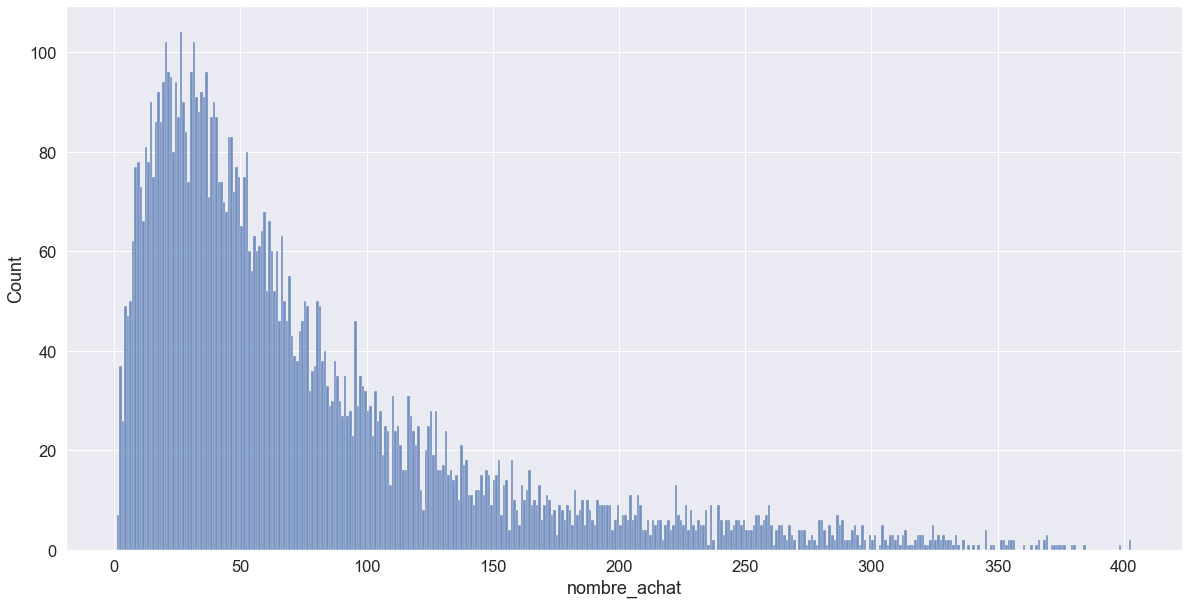

In [85]:
plt.rcParams["figure.figsize"] = (20,10)

sns.histplot(data=nb_produits_dis, x='nombre_achat',binwidth=1)

In [86]:
# Une fois de plus, ce sont des donénes de comptage suivant une loi de Poisson. 

model_nb_achat = smf.glm('nombre_achat ~ groupe_age', data = nb_produits_dis, family=sm.families.Poisson()).fit()
print(model_nb_achat.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           nombre_achat   No. Observations:                 8159
Model:                            GLM   Df Residuals:                     8156
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6930e+05
Date:                Wed, 30 Mar 2022   Deviance:                   2.9155e+05
Time:                        08:24:12   Pearson chi2:                 3.03e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.4823    

In [87]:
np.exp([3.4823,3.4823+1.2794,3.4823+0.5324])

array([ 32.53446536, 116.94456277,  55.40667091])

In [88]:
model_nb_achat0 = smf.glm('nombre_achat ~ 1', data = nb_produits_dis, family=sm.families.Poisson()).fit()
print(model_nb_achat0.summary())
print(' ')
print(' ')
print(' ')
print('AIC du modèle :')
print("modèle nul =",model_nb_achat0.aic)
print("modèle groupe_age =",model_nb_achat.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           nombre_achat   No. Observations:                 8159
Model:                            GLM   Df Residuals:                     8158
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3926e+05
Date:                Wed, 30 Mar 2022   Deviance:                   4.3147e+05
Time:                        08:24:12   Pearson chi2:                 5.11e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3263      0.001   3399.167      0.0

L'âge a bien un effet sur le nombre total de produits achetés.

### <a name="C10"> III-3) Lien entre l'âge et la taille du panier moyen

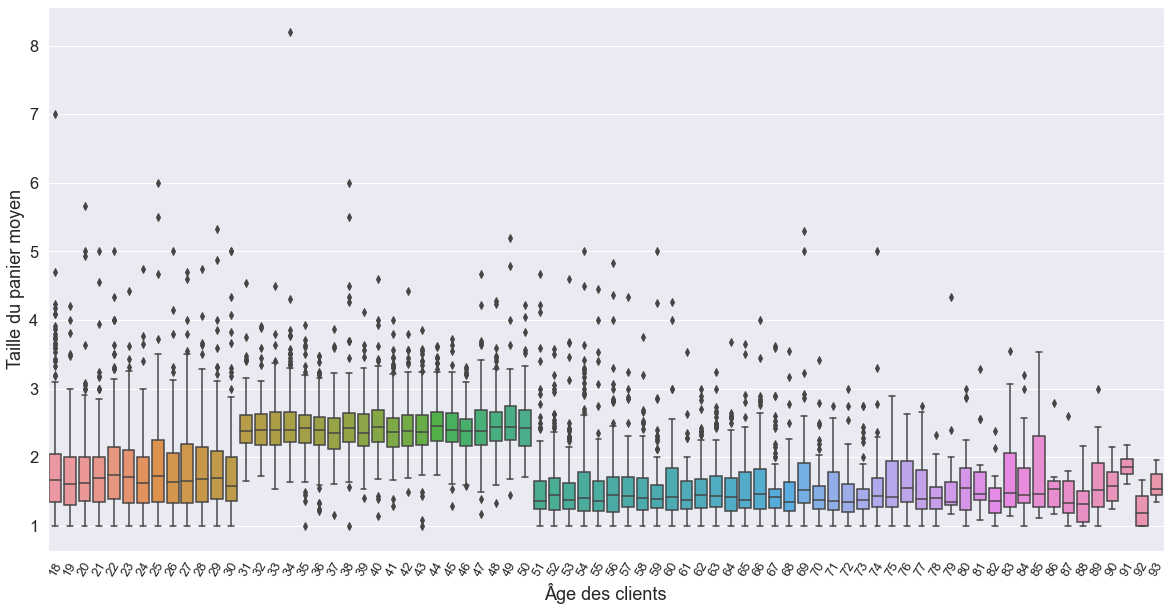

In [89]:
plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(y='nombre_achat', 
            x='age', 
            data=client_session.groupby(['client_id','age']).agg({'nombre_achat':'mean'}).reset_index())
plt.xticks(rotation=60,fontsize=13)
plt.xlabel('Âge des clients')
plt.ylabel('Taille du panier moyen')
plt.savefig('fig13a_taille_panier1.png', dpi=300, bbox_inches='tight')

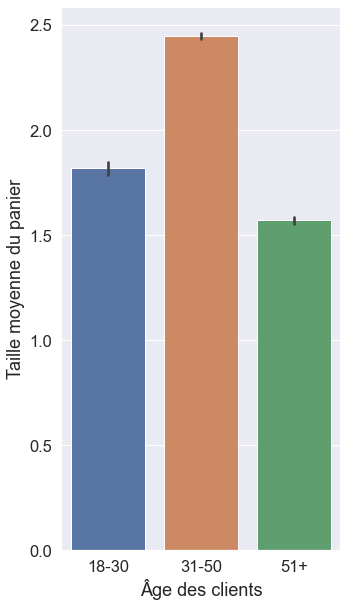

In [90]:
taille_panier=client_session.groupby(['client_id','groupe_age']).agg({'nombre_achat':'mean'}).reset_index()
taille_panier=taille_panier[taille_panier['nombre_achat'] != 0]

plt.rcParams["figure.figsize"] = (5,10)
sns.barplot(x="groupe_age", y='nombre_achat', data=taille_panier, order=["18-30", "31-50","51+"])
plt.xlabel('Âge des clients')
plt.ylabel("Taille moyenne du panier")
plt.savefig('fig13b_taille_panier2.png', dpi=300, bbox_inches='tight')

#### Test statistique

<AxesSubplot:xlabel='nombre_achat', ylabel='Count'>

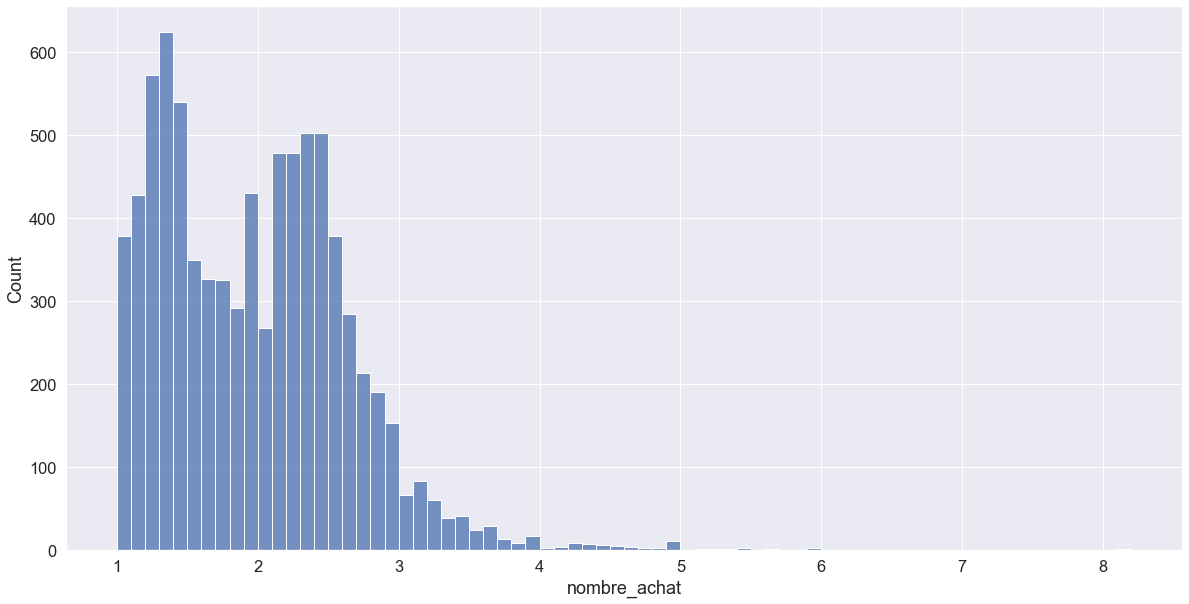

In [91]:
plt.rcParams["figure.figsize"] = (20,10)

sns.histplot(data=taille_panier, x='nombre_achat',binwidth=0.1)

In [92]:
# Analysons la distribution des résidus pour confirmer l'utilisation de l'ANOVA.
# Création du modèle :
model_nb_achat1 = smf.ols('nombre_achat ~ groupe_age', data = taille_panier).fit()
model_nb_achat1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           nombre_achat   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     2285.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:24:17   Log-Likelihood:                -6411.5
No. Observations:                8159   AIC:                         1.283e+04
Df Residuals:                    8156   BIC:                         1.285e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.8173      0.012    146.355      0.000       1.793       1.842
groupe_age[T.31-50]     0.6321      0.015     40.973      0.000       0.602       0.662
groupe_age[T.51+]      -0.2477      0.016    -15.687      0.000      -0.279      -0.217
==============================================================================
Omnibus:                     3842.144   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31865.057
Skew:                           2.082   Prob(JB):                         0.00
Kurtosis:                      11.741   Cond. No.                         4.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

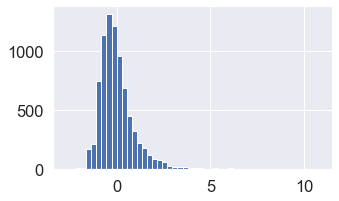

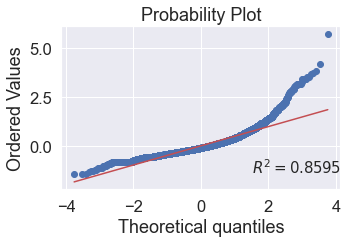

valeur de la statistique : 0.8599339127540588 , p-value : 0.0


B:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [93]:
# Analyse des résidus :

plt.rcParams["figure.figsize"] = (5,3)

residues = model_nb_achat1.resid_pearson
residues_std = residues/np.sqrt(sum(residues**2)/(len(residues)-1))
plt.hist(residues_std,bins=50)
plt.show()

import scipy.stats as stats

normality_plot, stat = stats.probplot(model_nb_achat1.resid, plot= plt, rvalue= True)
plt.show()

w, pvalue = stats.shapiro(model_nb_achat1.resid)
print(f"valeur de la statistique : {w} , p-value : {pvalue}")

In [94]:
model_nb_achat = smf.glm('nombre_achat ~ groupe_age', data = taille_panier, family=sm.families.Poisson()).fit()

print(model_nb_achat.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           nombre_achat   No. Observations:                 8159
Model:                            GLM   Df Residuals:                     8156
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11004.
Date:                Wed, 30 Mar 2022   Deviance:                       1096.8
Time:                        08:24:18   Pearson chi2:                 1.25e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5973    

In [95]:
model_nb_achat0 = smf.glm('nombre_achat ~ 1', data = taille_panier, family=sm.families.Poisson()).fit()
print(model_nb_achat0.summary())
print(' ')
print(' ')
print(' ')
print('AIC du modèle :')
print("modèle nul =",model_nb_achat0.aic)
print("modèle groupe_age =",model_nb_achat.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           nombre_achat   No. Observations:                 8159
Model:                            GLM   Df Residuals:                     8158
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11326.
Date:                Wed, 30 Mar 2022   Deviance:                       1741.3
Time:                        08:24:18   Pearson chi2:                 1.81e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6871      0.008     87.507      0.0

### <a name="C11"> III-4) Lien entre l'âge et montant du panier moyen

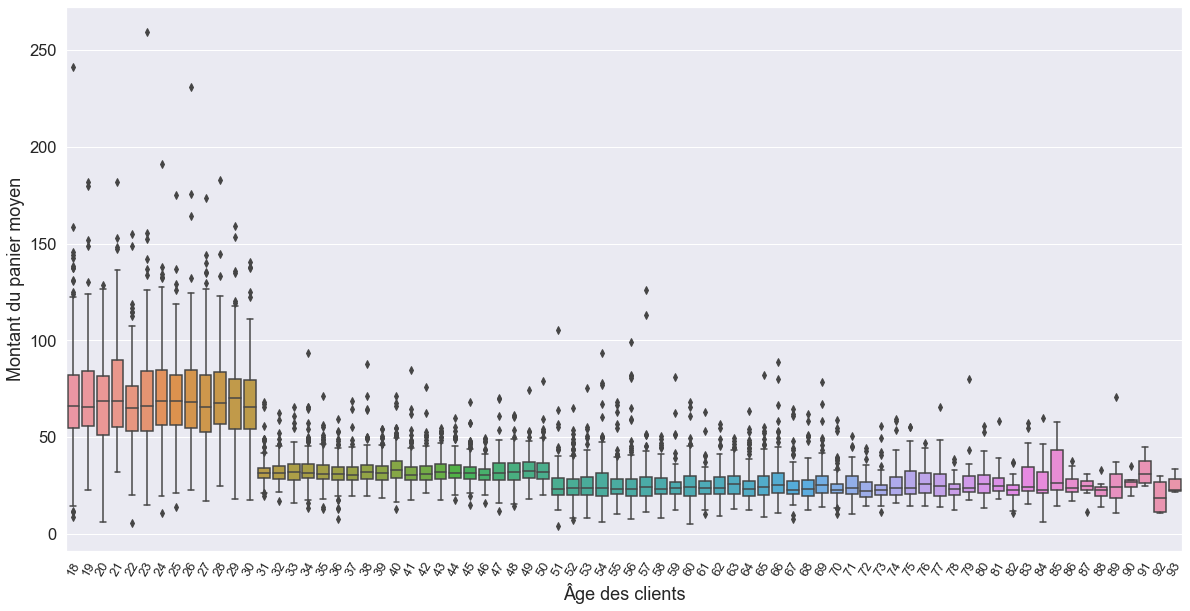

In [96]:
plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(y='Somme_panier', 
            x='age', 
            data=client_session.groupby(['client_id','age']).agg({'Somme_panier':'mean'}).reset_index())
plt.xticks(rotation=60,fontsize=13)
plt.xlabel('Âge des clients')
plt.ylabel('Montant du panier moyen')
plt.savefig('fig14a_montant_moy_panier1.png', dpi=300, bbox_inches='tight')

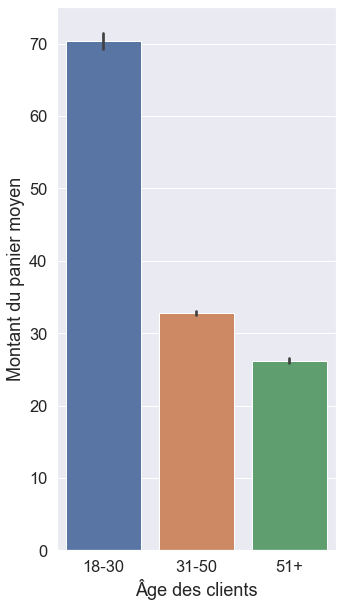

In [97]:
montant_panier_groupe=client_session.groupby(['client_id','groupe_age']).agg({'Somme_panier':'mean'}).reset_index()
montant_panier_groupe= montant_panier_groupe[montant_panier_groupe['Somme_panier'] != 0]


plt.rcParams["figure.figsize"] = (5,10)

sns.barplot(x="groupe_age", y='Somme_panier', data=montant_panier_groupe,order=["18-30", "31-50","51+"])
plt.xlabel('Âge des clients')
plt.ylabel("Montant du panier moyen")
plt.savefig('fig14b_montant_moy_panier1.png', dpi=300, bbox_inches='tight')

#### Test statistique

<AxesSubplot:xlabel='Somme_panier', ylabel='Count'>

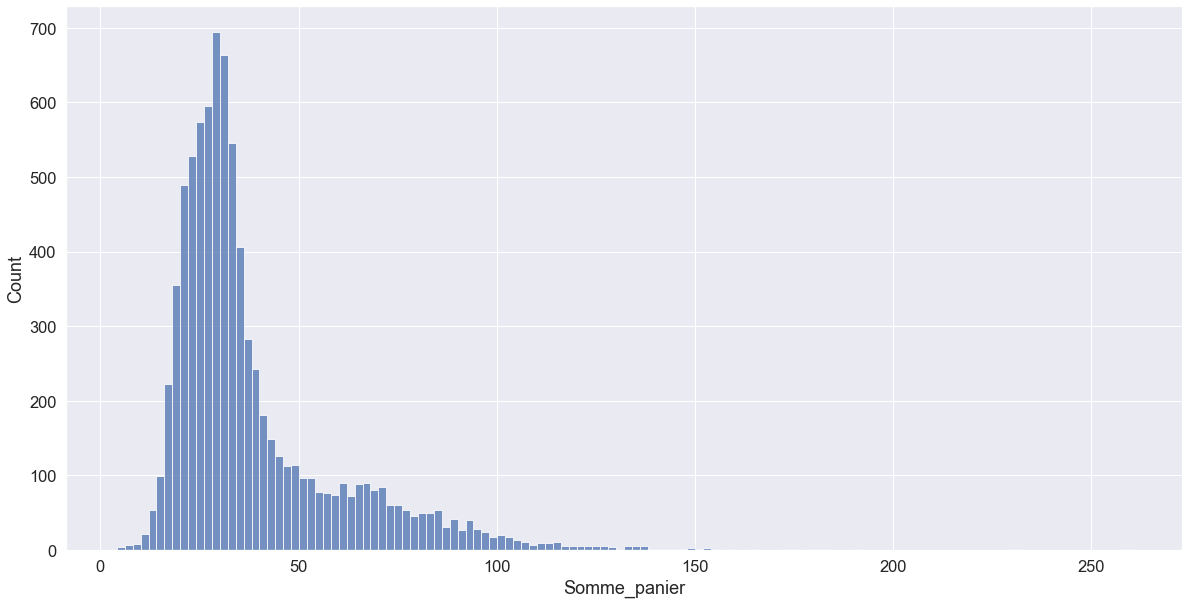

In [98]:
plt.rcParams["figure.figsize"] = (20,10)

sns.histplot(data=montant_panier_groupe, x='Somme_panier',binwidth=2)

                            OLS Regression Results                            
Dep. Variable:           Somme_panier   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     6186.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:24:23   Log-Likelihood:                -33097.
No. Observations:                8159   AIC:                         6.620e+04
Df Residuals:                    8156   BIC:                         6.622e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              70.4093    

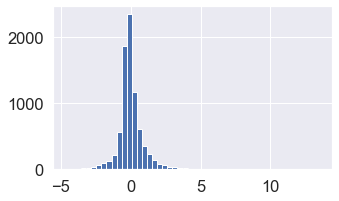

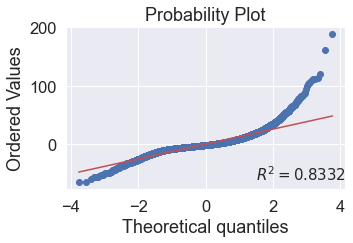

valeur de la statistique : 0.8339899778366089 , p-value : 0.0


B:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [99]:
model_montant_panier = smf.ols('Somme_panier ~ groupe_age', data = montant_panier_groupe).fit()

print(model_montant_panier.summary())

# Analyse des résidus :

plt.rcParams["figure.figsize"] = (5,3)

residues = model_montant_panier.resid_pearson
residues_std = residues/np.sqrt(sum(residues**2)/(len(residues)-1))
plt.hist(residues_std,bins=50)
plt.show()

import scipy.stats as stats

normality_plot, stat = stats.probplot(model_montant_panier.resid, plot= plt, rvalue= True)
plt.show()

w, pvalue = stats.shapiro(model_montant_panier.resid)
print(f"valeur de la statistique : {w} , p-value : {pvalue}")

In [100]:
#test de l'homoscedasticité : test de bartlett

from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=montant_panier_groupe, res_var='Somme_panier', xfac_var='groupe_age')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),4035.1441
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [101]:
model_montant_panier = smf.glm('Somme_panier ~ groupe_age', data = montant_panier_groupe).fit()
print(model_montant_panier.summary())
model_montant_panier2 = smf.glm('Somme_panier ~ groupe_age', data = montant_panier_groupe,family=sm.families.Poisson()).fit()
print(model_montant_panier2.summary())
model_montant_panier0 = smf.glm('Somme_panier ~ 1', data = montant_panier_groupe).fit()
print(model_montant_panier0.summary())
print(' ')
print(' ')
print(' ')
print('AIC du modèle :')
print("modèle nul =",model_montant_panier0.aic)
print("modèle groupe_age =",model_montant_panier.aic)
print("modèle groupe_age2 =",model_montant_panier2.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Somme_panier   No. Observations:                 8159
Model:                            GLM   Df Residuals:                     8156
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          195.48
Method:                          IRLS   Log-Likelihood:                -33097.
Date:                Wed, 30 Mar 2022   Deviance:                   1.5943e+06
Time:                        08:24:23   Pearson chi2:                 1.59e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              70.4093    

### <a name="C12"> III-5) Lien entre l'âge et le chiffre d'affaires total 

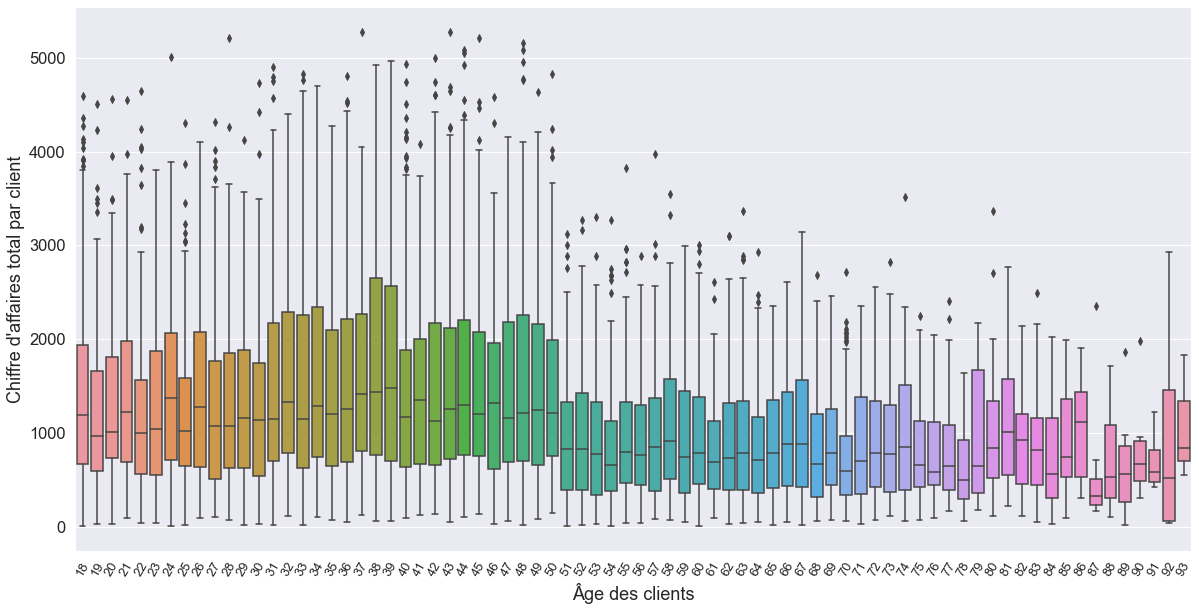

In [102]:
plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(y='Somme_panier', 
            x='age', 
            data=client_session.groupby(['client_id','age']).agg({'Somme_panier':'sum'}).reset_index())
plt.xticks(rotation=60,fontsize=13)
plt.xlabel('Âge des clients')
plt.ylabel("Chiffre d'affaires total par client")
plt.savefig('fig15a_CA_client1.png', dpi=300, bbox_inches='tight')

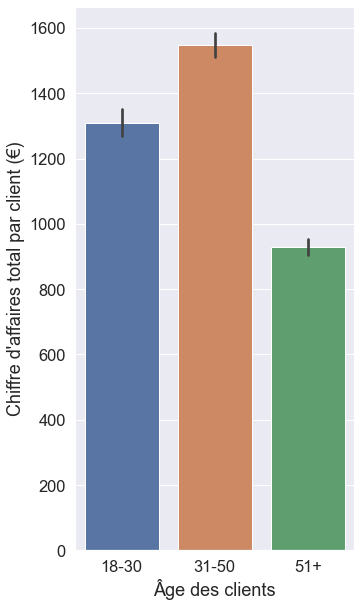

In [103]:
CA_groupe=client_session.groupby(['client_id','groupe_age']).agg({'Somme_panier':'sum'}).reset_index()
CA_groupe= CA_groupe[CA_groupe['Somme_panier'] != 0]


plt.rcParams["figure.figsize"] = (5,10)
#sns.violinplot(x="groupe_age", y='Somme_panier', data=CA_groupe,order=["18-30", "31-50","51+"])
sns.barplot(x="groupe_age", y='Somme_panier', data=CA_groupe,order=["18-30", "31-50","51+"])
plt.xlabel('Âge des clients')
plt.ylabel("Chiffre d'affaires total par client (€)")
plt.savefig('fig15b_CA_client1.png', dpi=300, bbox_inches='tight')

#### Test statistique

<AxesSubplot:xlabel='Somme_panier', ylabel='Count'>

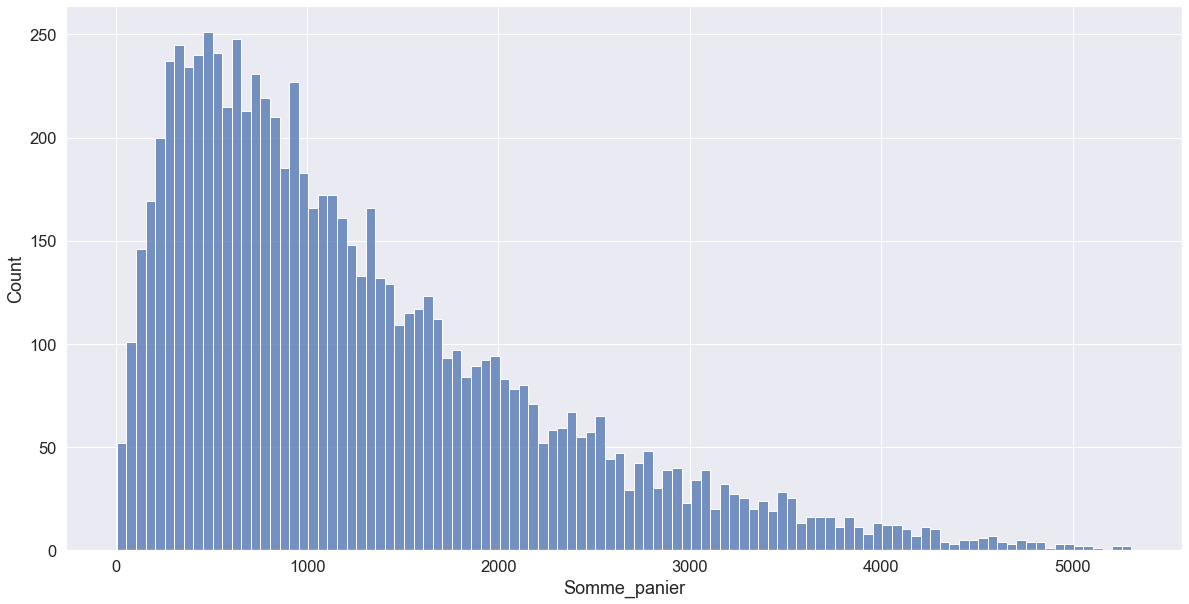

In [104]:
plt.rcParams["figure.figsize"] = (20,10)

sns.histplot(data=CA_groupe, x='Somme_panier',binwidth=50)

                            OLS Regression Results                            
Dep. Variable:           Somme_panier   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     365.0
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          1.55e-152
Time:                        08:24:29   Log-Likelihood:                -67200.
No. Observations:                8159   AIC:                         1.344e+05
Df Residuals:                    8156   BIC:                         1.344e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1310.0406    

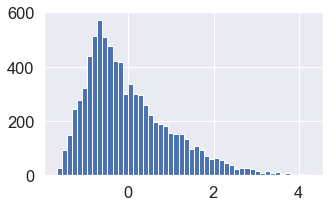

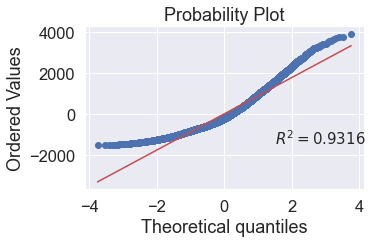

valeur de la statistique : 0.9314847588539124 , p-value : 0.0


B:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [105]:
model_somme_panier = smf.ols('Somme_panier ~ groupe_age', data = CA_groupe).fit()

print(model_somme_panier.summary())

# Analyse des résidus :

plt.rcParams["figure.figsize"] = (5,3)

residues = model_somme_panier.resid_pearson
residues_std = residues/np.sqrt(sum(residues**2)/(len(residues)-1))
plt.hist(residues_std,bins=50)
plt.show()

import scipy.stats as stats

normality_plot, stat = stats.probplot(model_somme_panier.resid, plot= plt, rvalue= True)
plt.show()

w, pvalue = stats.shapiro(model_somme_panier.resid)
print(f"valeur de la statistique : {w} , p-value : {pvalue}")

In [106]:
model_somme_panier = smf.glm('Somme_panier ~ groupe_age', data = CA_groupe, family=sm.families.Gaussian()).fit()
print(model_somme_panier.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Somme_panier   No. Observations:                 8159
Model:                            GLM   Df Residuals:                     8156
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                      8.3502e+05
Method:                          IRLS   Log-Likelihood:                -67200.
Date:                Wed, 30 Mar 2022   Deviance:                   6.8104e+09
Time:                        08:24:29   Pearson chi2:                 6.81e+09
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1310.0406    

In [107]:
model_somme_panier0 = smf.glm('Somme_panier ~ 1', data = CA_groupe, family=sm.families.Gaussian()).fit()
print(model_somme_panier0.summary())
print(' ')
print(' ')
print(' ')
print('AIC du modèle :')
print("modèle nul =",model_somme_panier0.aic)
print("modèle groupe_age =",model_somme_panier.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Somme_panier   No. Observations:                 8159
Model:                            GLM   Df Residuals:                     8158
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                      9.0953e+05
Method:                          IRLS   Log-Likelihood:                -67550.
Date:                Wed, 30 Mar 2022   Deviance:                   7.4199e+09
Time:                        08:24:29   Pearson chi2:                 7.42e+09
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1270.2150     10.558    120.306      0.0

## <a name="C13"> III-6) Lien entre l'âge et la catégorie de livre acheté.

In [108]:
# Repartons du fichier initial transaction_filter. 
transactions_filter

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,date_MY,date_DMY
480501,0_1259,11.99,0,2019-03-01 00:01:07.843138,s_1,c_329,f,1967,55,2019-03,2019-03-01
428350,0_1390,19.37,0,2019-03-01 00:02:26.047414,s_2,c_664,m,1960,62,2019-03,2019-03-01
462563,0_1352,4.50,0,2019-03-01 00:02:38.311413,s_3,c_580,m,1988,34,2019-03,2019-03-01
488153,0_1458,6.55,0,2019-03-01 00:04:54.559692,s_4,c_7912,f,1989,33,2019-03,2019-03-01
438944,0_1358,16.49,0,2019-03-01 00:05:18.801198,s_5,c_2033,f,1956,66,2019-03,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...
184602,1_508,21.92,1,2021-02-28 23:49:03.148402,s_348444,c_3573,f,1996,26,2021-02,2021-02-28
588008,2_37,48.99,2,2021-02-28 23:51:29.318531,s_348445,c_50,f,1994,28,2021-02,2021-02-28
130140,1_695,26.99,1,2021-02-28 23:53:18.929676,s_348446,c_488,f,1985,37,2021-02,2021-02-28
550293,0_1547,8.99,0,2021-02-28 23:58:00.107815,s_348447,c_4848,m,1953,69,2021-02,2021-02-28


In [109]:
# On rajoute la colonne groupe_age comme précédemment
age = pd.cut(transactions_filter['age'], [18,30, 50,93],3,labels=['18-30','31-50','51+'])
transactions_filter['groupe_age']=age

In [110]:
# On crée un tableau de contingence avec le nombre de livres vendus par groupe d'âge et par catégorie. 
age_categ_sum=transactions_filter.pivot_table(index='groupe_age', columns="categ", values='date', aggfunc='count').reset_index()
age_categ_sum=age_categ_sum.set_index('groupe_age')
age_categ_sum

categ,0,1,2
groupe_age,,,
18-30,13273,22368,23867
31-50,299245,92811,1475
51+,71345,91450,1494


In [111]:
#Comme précédemment, nous pouvons réaliser un test de Chi2 pour vérifier 
#si les différents groupe d'âge achètent préférentiellement certaines catégories :
#H0 : Les effectifs sont répartis équitablement : Les deux variables (âge-categorie) sont indépendantes
#H1 : Les effectifs ne sont pas répartis équitablement : Les deux variables (âge-categorie) ne sont pas indépendantes
chi2, p, dof, ex = chi2_contingency(age_categ_sum, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
print(f"Les valeurs attendues sous H0:\n {ex}")

Chi2 result of the contingency table: 266441.70629731467, p-value: 0.0
Les valeurs attendues sous H0:
 [[ 37002.88890833  19918.22585724   2586.88523443]
 [244702.96220648 131720.76594452  17107.271849  ]
 [102157.1488852   54990.00819823   7141.84291657]]


In [112]:
# Pour la représentation graphique, on change le format du DF (wide to long)
age_categ_sum2=pd.melt(age_categ_sum.reset_index(), id_vars='groupe_age', value_vars=[0, 1, 2])
age_categ_sum2['perc'] = age_categ_sum2.groupby('groupe_age')['value'].apply(lambda x: x*100/x.sum())
age_categ_sum2

,groupe_age,categ,value,perc
0,18-30,0,13273,22.304564
1,31-50,0,299245,76.041023
2,51+,0,71345,43.426523
3,18-30,1,22368,37.588223
4,31-50,1,92811,23.584165
5,51+,1,91450,55.664104
6,18-30,2,23867,40.107212
7,31-50,2,1475,0.374812
8,51+,2,1494,0.909373


  groupe_age categ   value       perc       perc2
0      18-30     0   13273  22.304564  100.000000
1      31-50     0  299245  76.041023  100.000000
2        51+     0   71345  43.426523  100.000000
3      18-30     1   22368  37.588223   62.759182
4      31-50     1   92811  23.584165   23.672894
5        51+     1   91450  55.664104   56.174944
6      18-30     2   23867  40.107212   40.107212
7      31-50     2    1475   0.374812    0.374812
8        51+     2    1494   0.909373    0.909373


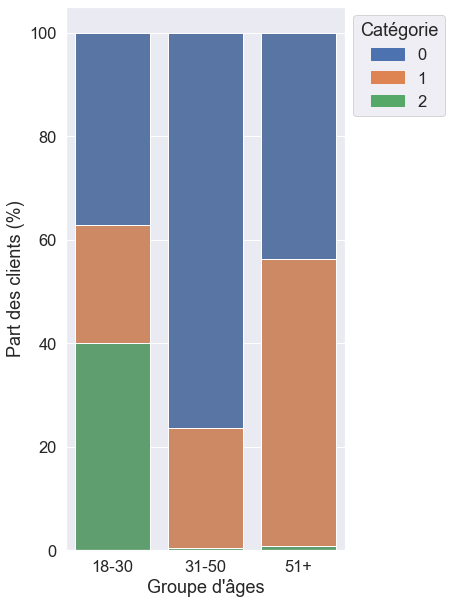

In [113]:
#création d'une colonne qui montre le pourcentage de ventes de chaque catégorie par groupe d'âges.
age_categ_sum2['perc2'] = age_categ_sum2.groupby('groupe_age')['value'].apply(lambda x: x*100/x.cumsum())
print(age_categ_sum2)


#choix des couleurs pour une chart graphique homogène
palette_tab10 = sns.color_palette()
palette = sns.color_palette([palette_tab10[0], palette_tab10[1], palette_tab10[2]])
plt.rcParams["figure.figsize"] = (5,10)

labels=['18-30','31-50','51+']
tickvalues = range(0,3)
bar1 = sns.barplot(x="groupe_age",  y="perc2", data=age_categ_sum2.loc[age_categ_sum2['categ']==0],color=palette[0])
bar2 = sns.barplot(x="groupe_age",  y="perc2", data=age_categ_sum2.loc[age_categ_sum2['categ']==1],color=palette[1])
bar3 = sns.barplot(x="groupe_age",  y="perc2", data=age_categ_sum2.loc[age_categ_sum2['categ']==2],color=palette[2])
plt.xticks(ticks = tickvalues ,labels=labels)
plt.xlabel("Groupe d'âges")
plt.ylabel("Part des clients (%)")

top_bar = mpatches.Patch(color=palette[0], label='0')
mid_bar = mpatches.Patch(color=palette[1], label='1')
bottom_bar = mpatches.Patch(color=palette[2], label='2')

plt.legend(handles=[top_bar,mid_bar ,bottom_bar],
           title = "Catégorie",
           bbox_to_anchor=(1.00,1))
plt.savefig('fig16_gAge_categ.png', dpi=300, bbox_inches='tight')
plt.show()

## <a name="C14"> III-7) Lien entre le genre et la catégorie de livre acheté

In [114]:
#On crée une nouvelle fois un tableau de contingence
sexe_categ=pd.crosstab(transactions_filter['sex'],transactions_full['categ'])
sexe_categ

categ,0,1,2
sex,,,
f,200793,111331,16980
m,186488,101017,15868


In [115]:
#Comme précédemment, nous pouvons réaliser un test de Chi2 pour vérifier 
#si les différents groupe d'âge achètent préférentiellement certaines catégories :
#H0 : Les effectifs sont répartis équitablement : Les deux variables (genre-categorie) sont indépendantes
#H1 : Les effectifs ne sont pas répartis équitablement : Les deux variables (genre-categorie) ne sont pas indépendantes

chi2, p, dof, ex = chi2_contingency(sexe_categ, correction=True)
print(f"valeur de la statistique: {chi2}, p-value: {p}")
print(f"Les valeurs attendues sous H0:\n {ex}")

valeur de la statistique: 20.213460693513895, p-value: 4.080400389217356e-05
Les valeurs attendues sous H0:
 [[201518.35754344 110493.46646914  17092.17598743]
 [185762.64245656 101854.53353086  15755.82401257]]


In [116]:
#création d'une colonne qui montre le pourcentage de ventes de chaque catégorie par sexe.
sex_categ2=pd.melt(sexe_categ.reset_index(), id_vars='sex', value_vars=[0, 1, 2])
sex_categ2['perc'] = sex_categ2.groupby('sex')['value'].apply(lambda x: x*100/x.sum())
print(sex_categ2)

#création d'une colonne qui montre le pourcentage de ventes de chaque catégorie par groupe d'âges.
sex_categ2['perc2'] = sex_categ2.groupby('sex')['value'].apply(lambda x: x*100/x.cumsum())
print(sex_categ2)


  sex categ   value       perc
0   f     0  200793  61.012021
1   m     0  186488  61.471522
2   f     1  111331  33.828516
3   m     1  101017  33.297953
4   f     2   16980   5.159463
5   m     2   15868   5.230525
  sex categ   value       perc       perc2
0   f     0  200793  61.012021  100.000000
1   m     0  186488  61.471522  100.000000
2   f     1  111331  33.828516   35.668837
3   m     1  101017  33.297953   35.135737
4   f     2   16980   5.159463    5.159463
5   m     2   15868   5.230525    5.230525


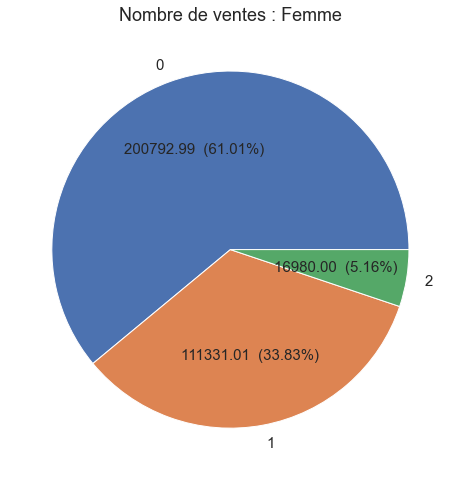

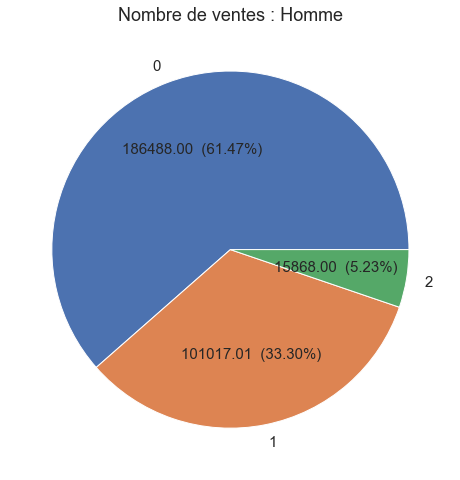

In [117]:
# représentation en diagramme circulaire (avec effectif et pourcentage)
plt.rcParams["figure.figsize"] = (8,10)

plt.pie(sex_categ2.loc[sex_categ2['sex']=='f']['perc'], 
        labels = sex_categ2.loc[sex_categ2['sex']=='f']["categ"],
        autopct=make_autopct(sex_categ2.loc[sex_categ2['sex']=='f']["value"]),
        textprops={'fontsize':15})
plt.title("Nombre de ventes : Femme")
plt.savefig('fig17a_nb_vente_f.png', dpi=300, bbox_inches='tight')

plt.show()

plt.pie(sex_categ2.loc[sex_categ2['sex']=='m']['perc'],
        labels = sex_categ2.loc[sex_categ2['sex']=='m']["categ"],
        autopct=make_autopct(sex_categ2.loc[sex_categ2['sex']=='m']["value"]),
        textprops={'fontsize':15})
plt.title("Nombre de ventes : Homme")
plt.savefig('fig17b_nb_vente_h.png', dpi=300, bbox_inches='tight')

plt.show()

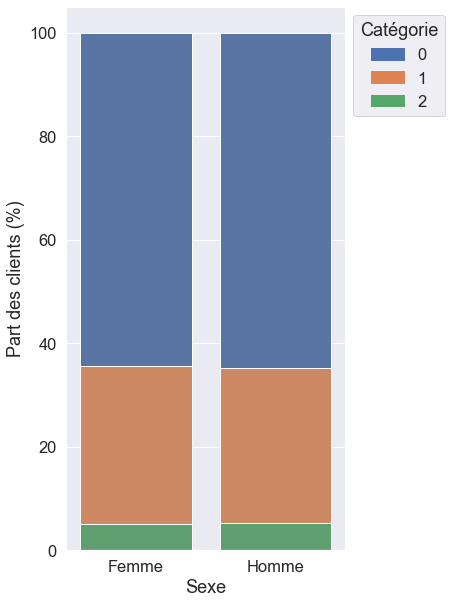

In [118]:
# Représentation en diagramme en bar (empilé)
plt.rcParams["figure.figsize"] = (5,10)

labels=['Femme','Homme']
tickvalues = range(0,2)
bar1 = sns.barplot(x="sex",  y="perc2", data=sex_categ2.loc[sex_categ2['categ']==0],color=palette[0])
bar2 = sns.barplot(x="sex",  y="perc2", data=sex_categ2.loc[sex_categ2['categ']==1],color=palette[1])
bar3 = sns.barplot(x="sex",  y="perc2", data=sex_categ2.loc[sex_categ2['categ']==2],color=palette[2])
plt.xticks(ticks = tickvalues ,labels=labels)
plt.xlabel("Sexe")
plt.ylabel("Part des clients (%)")

top_bar = mpatches.Patch(color=palette[0], label='0')
mid_bar = mpatches.Patch(color=palette[1], label='1')
bottom_bar = mpatches.Patch(color=palette[2], label='2')

plt.legend(handles=[top_bar,mid_bar ,bottom_bar],
           title = "Catégorie",
           bbox_to_anchor=(1.00,1))
plt.savefig('fig18_nb_vente_fh.png', dpi=300, bbox_inches='tight')

Le test statistique permet de rejeter H0, les deux variables ne sont pas indépendantes. Cependant, la proportion de vente de chaque catégorie est extrêmement similaire entre les Femmes et les Hommes. 